## Immigrant Data Analysis

In [78]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from scipy.stats import linregress
from pprint import pprint
import plotly.express as px
from urllib.request import urlopen
import json

## Age

In [79]:
age_file = os.path.join("Outputs", "Age.csv")
age_df = pd.read_csv(age_file, index_col=0)

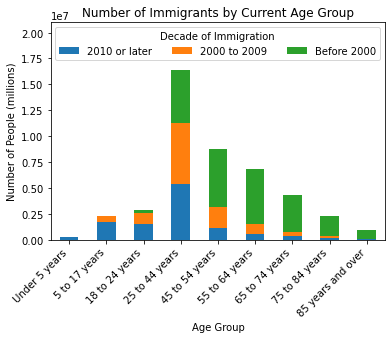

In [80]:
title = "Number of Immigrants by Current Age Group"
ylabel = "Number of People (millions)"
xlabel = "Age Group"
ylim = (0, 21_000_000)

age_df.plot.bar(stacked = True, title = title, ylim = ylim, ylabel = ylabel, xlabel = xlabel)
plt.legend(title="Decade of Immigration", ncol=3, loc="upper right")
plt.xticks(rotation=45, ha='right');

savename = "AgeGroups.svg"
plt.savefig("Images/"+ savename, bbox_inches='tight')

savename = "AgeGroups.png"
plt.savefig("Images/"+ savename, bbox_inches='tight')

Notes:

1) The plot above shows current age group, not the age group at the time of immigration.
2) The age groups are broken down into unequal age ranges. The longest age range is "25 to 44 years" and is also the range with the highest number of people. 

In [81]:
age_df_T = age_df.transpose()

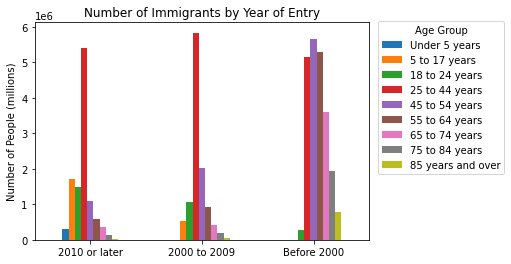

In [82]:
title = "Number of Immigrants by Year of Entry"
ylabel = "Number of People (millions)"

age_df_T.plot.bar(rot = 0, title = title, ylabel = ylabel);
plt.legend(bbox_to_anchor=(1.01,1.03), loc="upper left", title = "Age Group");

savename = "AgeGroupsDecade.svg"
plt.savefig("Images/"+ savename, bbox_inches='tight')

savename = "AgeGroupsDecade.png"
plt.savefig("Images/"+ savename, bbox_inches='tight')
#These plots show the age in 2020 of people who immigrated in various decades

## Continents

In [83]:
continent_file = os.path.join("Outputs", "Continents.csv")
continents_df = pd.read_csv(continent_file, index_col=0)

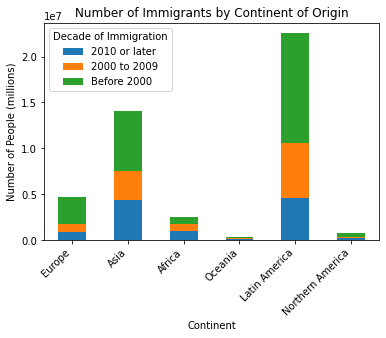

In [84]:
title = "Number of Immigrants by Continent of Origin"
ylabel = "Number of People (millions)"
xlabel = "Continent"

continents_df.plot.bar(stacked = True, title = title, ylabel = ylabel, xlabel = xlabel);
plt.legend(title="Decade of Immigration", ncol=1, loc="upper left")
plt.xticks(rotation=45, ha='right');

savename = "Continent.svg"
plt.savefig("Images/"+ savename, bbox_inches='tight')

savename = "Continent.png"
plt.savefig("Images/"+ savename, bbox_inches='tight')

In [85]:
#Create a data frame with certain percentages
continents_perc = continents_df[["2010 or later"]].copy()
continents_perc["2010 or Later %"] = (continents_perc["2010 or later"] / continents_perc["2010 or later"].sum())


continents_perc["All Years"] = continents_df.sum(axis = 1)
continents_perc["All Years %"] = (continents_perc["All Years"] / continents_perc["All Years"].sum())

continents_perc["Percentage Delta"] = continents_perc["2010 or Later %"] - continents_perc["All Years %"]


#Format the Percentages
continents_perc["2010 or Later %"] = continents_perc["2010 or Later %"].map('{:,.2%}'.format)
continents_perc["All Years %"] = continents_perc["All Years %"].map('{:,.2%}'.format)
continents_perc["Percentage Delta"] = continents_perc["Percentage Delta"].map('{:,.2%}'.format)
continents_perc.index.name = "Continent"

continents_perc.head()

,2010 or later,2010 or Later %,All Years,All Years %,Percentage Delta
Continent,,,,,
Europe,891372,8.00%,4664818,10.38%,-2.38%
Asia,4323154,38.80%,14110067,31.40%,7.40%
Africa,1013936,9.10%,2481479,5.52%,3.58%
Oceania,100279,0.90%,291304,0.65%,0.25%
Latin America,4623992,41.50%,22585529,50.27%,-8.77%


In [86]:
continents_df_T = continents_df.transpose()

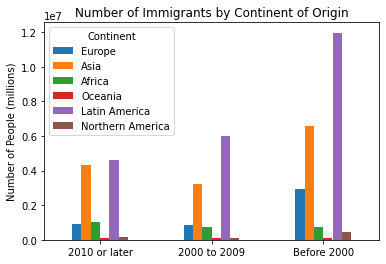

In [87]:
title = "Number of Immigrants by Continent of Origin"
ylabel = "Number of People (millions)"

continents_df_T.plot.bar(rot = 0, title = title, ylabel = ylabel);
plt.legend(loc="upper left", title = "Continent");

savename = "ContinentDecade.svg"
plt.savefig("Images/"+ savename, bbox_inches='tight')

savename = "ContinentDecade.png"
plt.savefig("Images/"+ savename, bbox_inches='tight')

## Education 25+

In [88]:
edu_25p_file = os.path.join("Outputs", "Education 25+.csv")
edu_25p_df = pd.read_csv(edu_25p_file, index_col=0)

edu_25p_df.rename(index={"High school graduate (includes equivalency)": "High school graduate (or equivalent)"}, inplace = True)

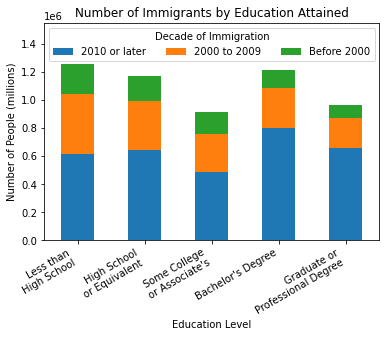

In [89]:
title = "Number of Immigrants by Education Attained"
ylabel = "Number of People (millions)"
xlabel = "Education Level"
ylim = (0, 1_550_000)

labels = ["Less than\nHigh School", "High School\nor Equivalent", "Some College\nor Associate's", "Bachelor's Degree", "Graduate or\nProfessional Degree"]
ticks = np.arange(0, len(labels), 1)

edu_25p_df.plot.bar(stacked = True, title = title, ylabel = ylabel, ylim = ylim, xlabel = xlabel);
plt.legend(title = "Decade of Immigration", ncol = 3, loc = "upper left")
plt.xticks(ticks, labels, rotation = 30, ha = 'right');

savename = "Education.svg"
plt.savefig("Images/"+ savename, bbox_inches='tight')

savename = "Education.png"
plt.savefig("Images/"+ savename, bbox_inches='tight')

In [90]:
edu_25p_T = edu_25p_df.transpose()

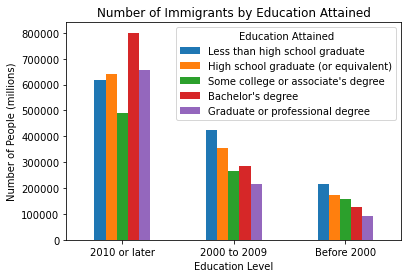

In [91]:
edu_25p_T.plot.bar(stacked = False, title = title, ylabel = ylabel, xlabel = xlabel, rot = 0);
plt.legend(title = "Education Attained", ncol = 1, loc = "upper right")

savename = "EducationDecade.svg"
plt.savefig("Images/"+ savename, bbox_inches='tight')

savename = "EducationDecade.png"
plt.savefig("Images/"+ savename, bbox_inches='tight')

## Gender

In [92]:
gender_file = os.path.join("Outputs", "Gender.csv")
gender_df = pd.read_csv(gender_file, index_col=0)

In [93]:
gender_df["Total"] = gender_df.sum(axis = 1)
gender_df["Percentage of All"] = gender_df["Total"] / gender_df["Total"].sum()

gender_df["Percentage of All"] = gender_df["Percentage of All"].map('{:,.2%}'.format)

gender_df.head(2)

,2010 or later,2000 to 2009,Before 2000,Total,Percentage of All
Label (Grouping),,,,,
Male,5470795,5285957,10899814,21656566,48.20%
Female,5671354,5749443,11855538,23276335,51.80%


## In School

The plots below have no context if we don't at some point note the total number of foreign-born individuals, as not all foreign-born individuals are currently attending school, but they all have a race, marital status, age, race, etc.

In [94]:
in_school_file = os.path.join("Outputs", "In School.csv")
in_school_df = pd.read_csv(in_school_file, index_col=0)

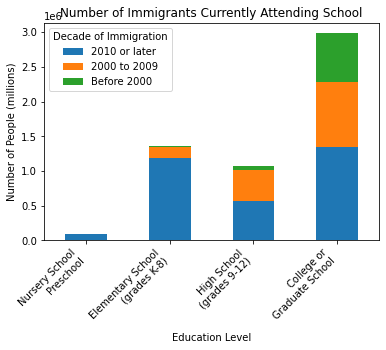

In [95]:
title = "Number of Immigrants Currently Attending School"
ylabel = "Number of People (millions)"
xlabel = "Education Level"

labels = ["Nursery School\nPreschool", "Elementary School\n(grades K-8)", "High School\n(grades 9-12)", "College or\nGraduate School"]
ticks = np.arange(0, len(labels), 1)

in_school_df.plot.bar(stacked = True, title = title, ylabel = ylabel, xlabel = xlabel)
plt.legend(title = "Decade of Immigration", ncol = 1, loc = "upper left")
plt.xticks(ticks, labels, rotation = 45, ha = 'right');

savename = "CurrentSchool.svg"
plt.savefig("Images/"+ savename, bbox_inches='tight')

savename = "CurrentSchool.png"
plt.savefig("Images/"+ savename, bbox_inches='tight')

In [96]:
in_school_T = in_school_df.transpose()

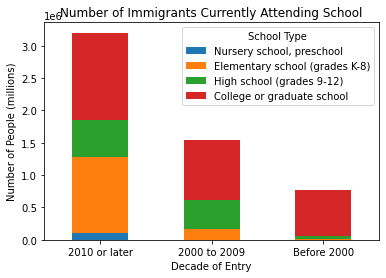

In [97]:
title = "Number of Immigrants Currently Attending School"
ylabel = "Number of People (millions)"
xlabel = "Decade of Entry"

in_school_T.plot.bar(stacked = True, title = title, ylabel = ylabel, xlabel = xlabel)
plt.legend(title="School Type", ncol=1, loc="upper right")
plt.xticks(rotation=0, ha='center');

savename = "CurrentSchoolDecade.svg"
plt.savefig("Images/"+ savename, bbox_inches='tight')

savename = "CurrentSchoolDecade.png"
plt.savefig("Images/"+ savename, bbox_inches='tight')

## Marital Status

In [98]:
marital_status_file = os.path.join("Outputs", "Marital Status.csv")
marital_status_df = pd.read_csv(marital_status_file, index_col=0)

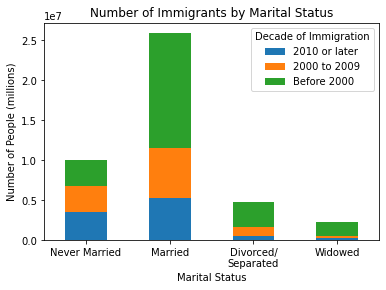

In [99]:
title = "Number of Immigrants by Marital Status"
ylabel = "Number of People (millions)"
xlabel = "Marital Status"

labels = ["Never Married", "Married", "Divorced/\nSeparated", "Widowed"]
ticks = np.arange(0, len(labels), 1)

marital_status_df.plot.bar(stacked = True, title = title, ylabel = ylabel, xlabel = xlabel)
plt.legend(title="Decade of Immigration", ncol=1, loc="upper right")
plt.xticks(ticks, labels, rotation=0, ha='center');

savename = "MaritalStatus.svg"
plt.savefig("Images/"+ savename, bbox_inches='tight')

savename = "MaritalStatus.png"
plt.savefig("Images/"+ savename, bbox_inches='tight')

In [100]:
marital_status_T = marital_status_df.transpose()

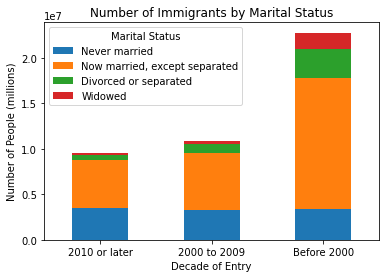

In [101]:
title = "Number of Immigrants by Marital Status"
ylabel = "Number of People (millions)"
xlabel = "Decade of Entry"

marital_status_T.plot.bar(stacked = True, title = title, ylabel = ylabel, xlabel = xlabel);
plt.legend(title="Marital Status", ncol=1, loc="upper left");
plt.xticks(rotation=0, ha='center');

savename = "MaritalStatusDecade.svg"
plt.savefig("Images/"+ savename, bbox_inches='tight')

savename = "MaritalStatusDecade.png"
plt.savefig("Images/"+ savename, bbox_inches='tight')

## Race

In [102]:
race_file = os.path.join("Outputs", "Race.csv")
race_df = pd.read_csv(race_file, index_col=0)
race_df.head(2)

,2010 or later,2000 to 2009,Before 2000
Label (Grouping),,,
One race,10819027,10803657,22254734
Two or more races,323122,231743,500618


## One Race

In [103]:
one_race_file = os.path.join("Outputs", "One Race.csv")
one_race_df = pd.read_csv(one_race_file, index_col=0)

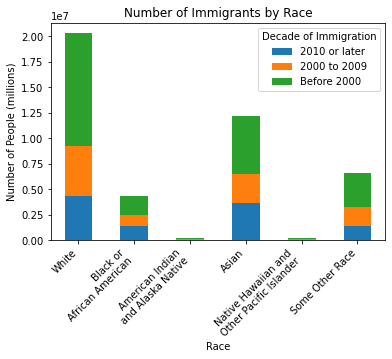

In [104]:
title = "Number of Immigrants by Race"
ylabel = "Number of People (millions)"
xlabel = "Race"

labels = ["White", "Black or\nAfrican American", "American Indian\nand Alaska Native", "Asian", "Native Hawaiian and\nOther Pacific Islander", "Some Other Race"]
ticks = np.arange(0, len(labels), 1)

one_race_df.plot.bar(stacked = True, title = title, ylabel = ylabel, xlabel = xlabel)
plt.legend(title="Decade of Immigration", ncol=1, loc="upper right")
plt.xticks(ticks, labels, rotation=45, ha='right');

savename = "Race.svg"
plt.savefig("Images/"+ savename, bbox_inches='tight')

savename = "Race.png"
plt.savefig("Images/"+ savename, bbox_inches='tight')

In [105]:
one_race_T = one_race_df.transpose()

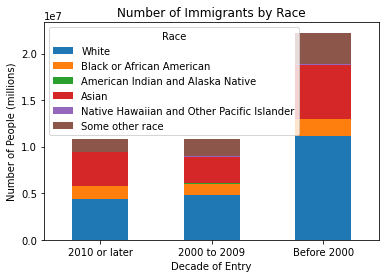

In [106]:
title = "Number of Immigrants by Race"
ylabel = "Number of People (millions)"
xlabel = "Decade of Entry"

one_race_T.plot.bar(stacked = True, title = title, ylabel = ylabel, xlabel = xlabel)
plt.legend(title="Race", ncol=1, loc="upper left")
plt.xticks(rotation=0, ha='center');

savename = "RaceDecade.svg"
plt.savefig("Images/"+ savename, bbox_inches='tight')

savename = "RaceDecade.png"
plt.savefig("Images/"+ savename, bbox_inches='tight')

## More Than One Race

"Two or more races" is on the same level as "Hispanic or Latino origin (of any race)" and "White alone, not Hispanic or Latino" in the original website's formatting.  The latter two are not a subset of the former.

Petition to change section to "White vs Hispanic in Origin"

In [107]:
more_than_one_race_file = os.path.join("Outputs", "More Than One Race.csv")
more_than_one_race_df = pd.read_csv(more_than_one_race_file, index_col=0)
more_than_one_race_df.head(2)

,2010 or later,2000 to 2009,Before 2000
Label (Grouping),,,
Hispanic or Latino origin (of any race),3988889,5352169,10512973
"White alone, not Hispanic or Latino",1883023,1533921,4391783


## Employment Status

In [108]:
employment_status_file = os.path.join("Outputs", "Job Status.csv")
employment_status_df = pd.read_csv(employment_status_file, index_col=0)

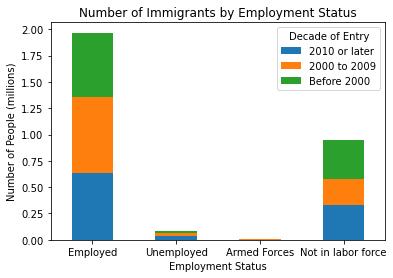

In [109]:
title = "Number of Immigrants by Employment Status"
ylabel = "Number of People (millions)"
xlabel = "Employment Status"

#To account for spaces the csv is adding in
employment_status_df.index = employment_status_df.index.str.strip()

employment_status_df.plot.bar(stacked = True, title = title, ylabel = ylabel, xlabel = xlabel)
plt.legend(title="Decade of Entry", ncol=1, loc="upper right")
plt.xticks(rotation=0, ha='center');

savename = "EmployStatus.svg"
plt.savefig("Images/"+ savename, bbox_inches='tight')

savename = "EmployStatus.png"
plt.savefig("Images/"+ savename, bbox_inches='tight')

In [110]:
employment_perc = employment_status_df.copy()
employment_perc["Total"] = employment_perc.sum(axis = 1)
employment_perc["Percentage of All"] = employment_perc["Total"] / employment_perc["Total"].sum()

employment_perc["Percentage of All"] = employment_perc["Percentage of All"].map('{:,.2%}'.format)
employment_perc.head(7)

,2010 or later,2000 to 2009,Before 2000,Total,Percentage of All
Label (Grouping),,,,,
Employed,0.637,0.722,0.608,1.967,65.54%
Unemployed,0.033,0.027,0.019,0.079,2.63%
Armed Forces,0.002,0.003,0.001,0.006,0.20%
Not in labor force,0.328,0.249,0.372,0.949,31.62%


## Occupation and Industry

In [111]:
occupation_file = os.path.join("Outputs", "Occupation.csv")
occupation_df = pd.read_csv(occupation_file, index_col=0)

industry_file = os.path.join("Outputs", "Industry.csv")
industry_df = pd.read_csv(industry_file, index_col=0)

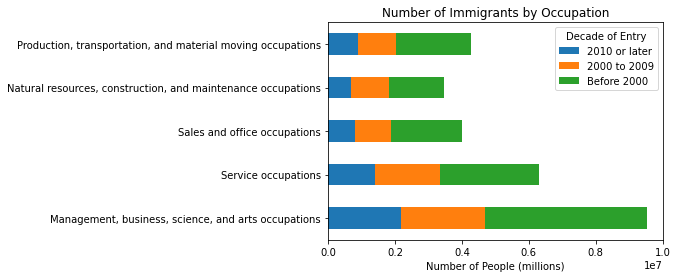

In [112]:
title = "Number of Immigrants by Occupation"
ylabel = ""
xlabel = "Number of People (millions)"

occupation_df.plot.barh(stacked = True, title = title,  ylabel = ylabel, xlabel = "")
plt.legend(title="Decade of Entry", ncol=1, loc="upper right")
plt.xlabel(xlabel)
plt.xticks(rotation=0, ha='center');

savename = "Occupation.svg"
plt.savefig("Images/"+ savename, bbox_inches='tight')

savename = "Occupation.png"
plt.savefig("Images/"+ savename, bbox_inches='tight')

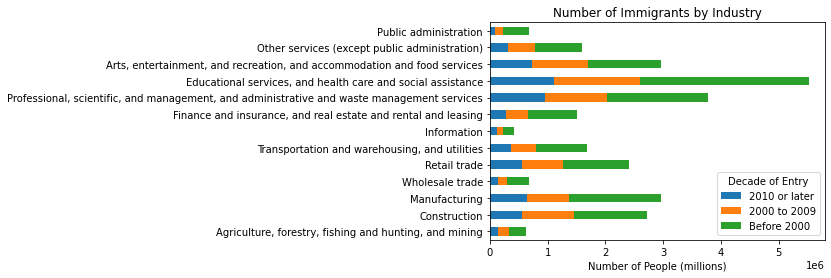

In [113]:
title = "Number of Immigrants by Industry"
ylabel = ""
xlabel = "Number of People (millions)"

industry_df.plot.barh(stacked = True, title = title, ylabel = ylabel, xlabel = "")
plt.legend(title="Decade of Entry", ncol=1, loc="lower right")
plt.xlabel(xlabel)
plt.xticks(rotation=0, ha='center');

savename = "Industry.svg"
plt.savefig("Images/"+ savename, bbox_inches='tight')

savename = "Industry.png"
plt.savefig("Images/"+ savename, bbox_inches='tight')

## Earnings

In [114]:
earnings_file = os.path.join("Outputs", "Earnings.csv")
earnings_df = pd.read_csv(earnings_file, index_col=0)

#Allow dollar signs to be displayed
pd.set_option('display.html.use_mathjax', False)

In [115]:
earnings_perc = earnings_df.copy()
earnings_perc["Total"] = earnings_perc.sum(axis = 1)
earnings_perc["% Immigrants"] = earnings_perc["Total"] / earnings_perc["Total"].sum()

earnings_perc["% Immigrants"] = earnings_perc["% Immigrants"].map('{:,.2%}'.format)
earnings_perc.head(7)

earnings_perc.index.name = "Earnings"

earnings_perc.style.set_table_styles([dict(selector="th",props=[('max-width', '25px')])])

earnings_perc

,2010 or later,2000 to 2009,Before 2000,Total,% Immigrants
Earnings,,,,,
"$1 to $9,999 or loss",96726,104554,162687,363967,1.74%
"$10,000 to $14,999",193452,209107,303683,706242,3.38%
"$15,000 to $24,999",773808,970025,1323190,3067023,14.69%
"$25,000 to $34,999",807452,1138473,1767869,3713794,17.79%
"$35,000 to $49,999",698109,1097813,2136627,3932549,18.84%
"$50,000 to $74,999",618205,964217,2136627,3719049,17.82%
"$75,000 or more",1021931,1324346,3025984,5372261,25.74%


## Annual Perm Res

In [116]:
annual_perm_res_file = os.path.join("Outputs", "Annual Perm Res.csv")
annual_perm_res_df = pd.read_csv(annual_perm_res_file, index_col=0)

The max is 1.826595 million people in 1991.


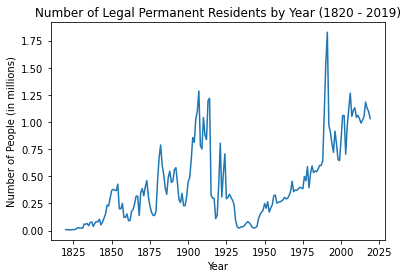

In [117]:
title = "Number of Legal Permanent Residents by Year (1820 - 2019)"
ylabel = "Number of People (in millions)"

annual_perm_res_df.plot.line(title = title, ylabel = ylabel, legend = False);

savename = "PermResYear.svg"
plt.savefig("Images/"+ savename, bbox_inches='tight')

savename = "PermResYear.png"
plt.savefig("Images/"+ savename, bbox_inches='tight')

max_imm = annual_perm_res_df["Number of Legal Permanent Residents (millions)"].max()
max_year = annual_perm_res_df["Number of Legal Permanent Residents (millions)"].idxmax()

print(f"The max is {max_imm} million people in {max_year}.")

## Immigrant Location 

In [118]:
imm_loc_file = os.path.join("Outputs", "Immigrant Location 2010-2020.csv")
imm_loc_df = pd.read_csv(imm_loc_file, index_col=0)
df = imm_loc_df["From 2010 to 2020"]
df = df.reset_index()

In [119]:
States = ["AL","AK","AZ","AR","CA","CO","CT","DE","DC","FL","GA","GU","HI","ID","IL","IN","IA","KS","KY","LA","ME","MD","MA","MI","MN","MS","MO","MT","NE","NV","NH","NJ","NM","NY","NC","ND","OH","OK","OR","PA","PR","RI","SC","SD","TN","TX","UT","VT","VA","WA","WV","WI","WY","NaN","NaN"]
df["States"] = States

In [120]:
fig = px.choropleth(locations=df["States"], locationmode="USA-states", color=df["From 2010 to 2020"], scope="usa")
fig.show()

savename = "Immigrant Location.svg"
fig.write_image("Images/"+ savename)

savename = "Immigrant Location.png"
fig.write_image("Images/"+ savename)

## Lawful Permanent Status

In [121]:
fam_related_file = os.path.join("Outputs", "Fam Related.csv")
fam_related_df = pd.read_csv(fam_related_file, index_col=0)

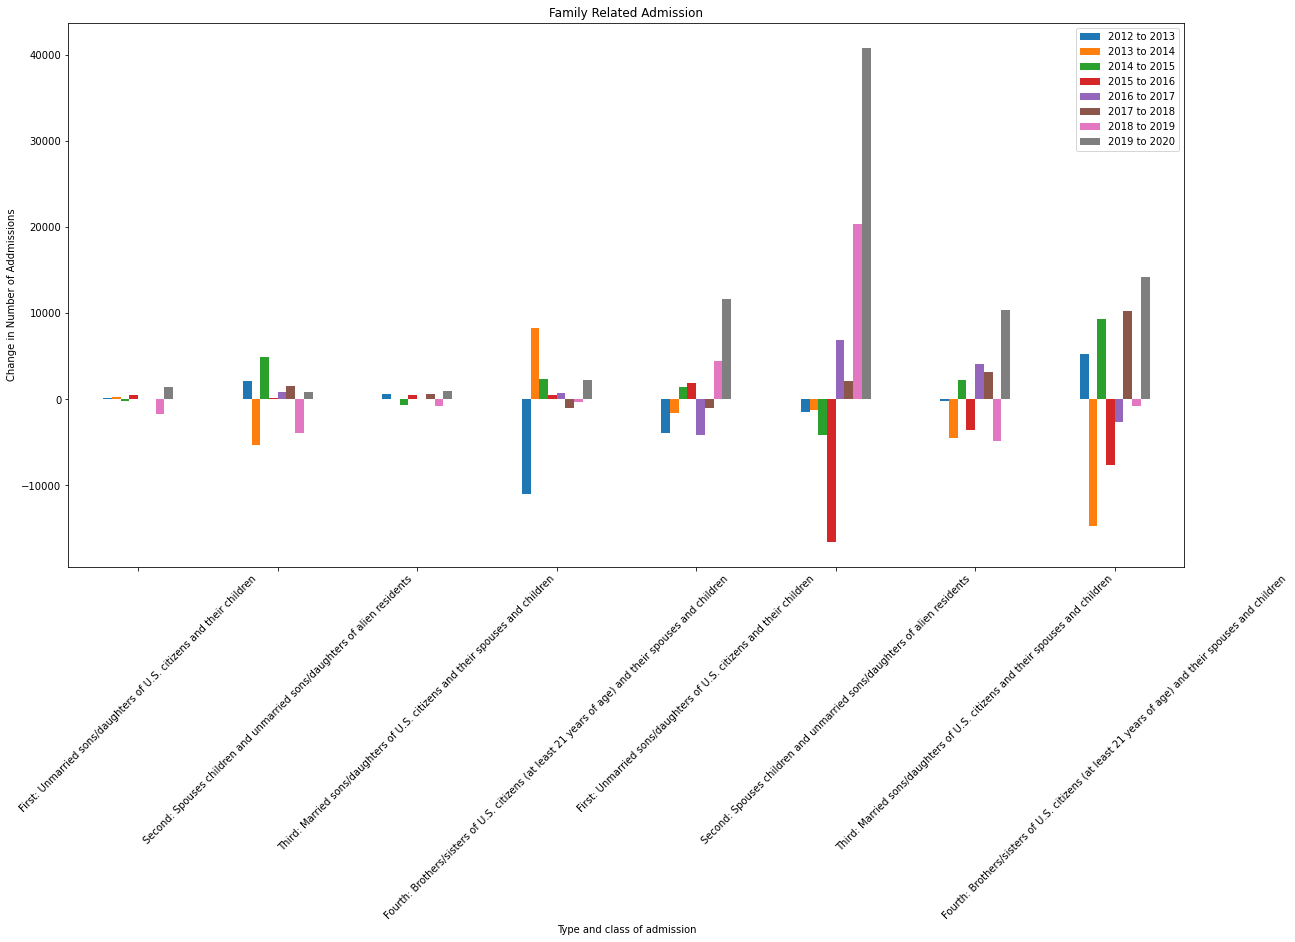

In [122]:
fam_related_df.plot.bar(title="Family Related Admission", ylabel="Change in Number of Addmissions", figsize=(20, 10), rot=45)

savename = "Family Related Admission.svg"
plt.savefig("Images/"+ savename, bbox_inches='tight')

savename = "Family Related Admission.png"
plt.savefig("Images/"+ savename, bbox_inches='tight')

In [123]:
career_related_file = os.path.join("Outputs", "Career Related.csv")
career_related_df = pd.read_csv(career_related_file, index_col=0)
career_related_df.head(11)

,2012 to 2013,2013 to 2014,2014 to 2015,2015 to 2016,2016 to 2017,2017 to 2018,2018 to 2019,2019 to 2020
Type and class of admission,,,,,,,,
First: Priority workers,484.0,-1515.0,-1106.0,-554.0,1963.0,2969.0,-1764.0,-8782.0
Second: Professionals with advanced degrees or aliens of exceptional ability,-11577.0,14088.0,4340.0,5993.0,305.0,-740.0,854.0,-5111.0
Third: Skilled workers professionals and unskilled workers,-3783.0,-650.0,5945.0,2770.0,-2506.0,682.0,417.0,-7486.0
Fourth: Certain special immigrants,1009.0,-1337.0,-1994.0,328.0,972.0,-269.0,338.0,-1746.0
Fifth: Employment creation (investors),-325.0,-192.0,478.0,-405.0,-237.0,-68.0,87.0,400.0
First: Priority workers,-146.0,-61.0,-28.0,-620.0,-161.0,-1423.0,1807.0,865.0
Second: Professionals with advanced degrees or aliens of exceptional ability,-490.0,137.0,117.0,-507.0,-778.0,-24.0,-265.0,951.0
Third: Skilled workers professionals and unskilled workers,-620.0,1126.0,-32.0,-1460.0,356.0,-1827.0,-2976.0,6055.0
Fourth: Certain special immigrants,-74.0,-94.0,-228.0,-121.0,-99.0,62.0,-236.0,651.0


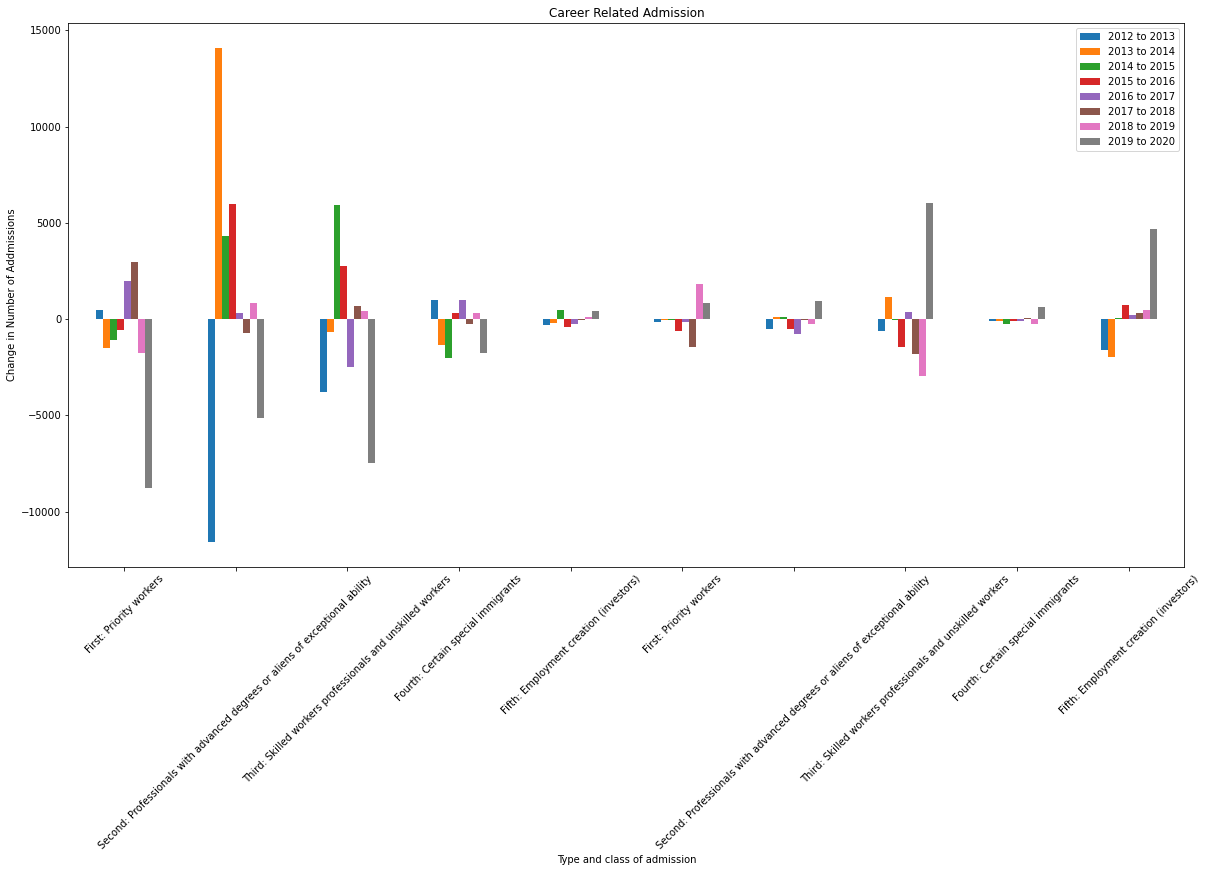

In [124]:
career_related_df.plot.bar(title="Career Related Admission", ylabel="Change in Number of Addmissions", figsize=(20, 10), rot=45)

savename = "Career Related Admission.svg"
plt.savefig("Images/"+ savename, bbox_inches='tight')

savename = "Career Related Admission.png"
plt.savefig("Images/"+ savename, bbox_inches='tight')

In [125]:
total_fam_related_file = os.path.join("Outputs", "Total Fam Related.csv")
total_fam_related_df = pd.read_csv(total_fam_related_file, index_col=0)

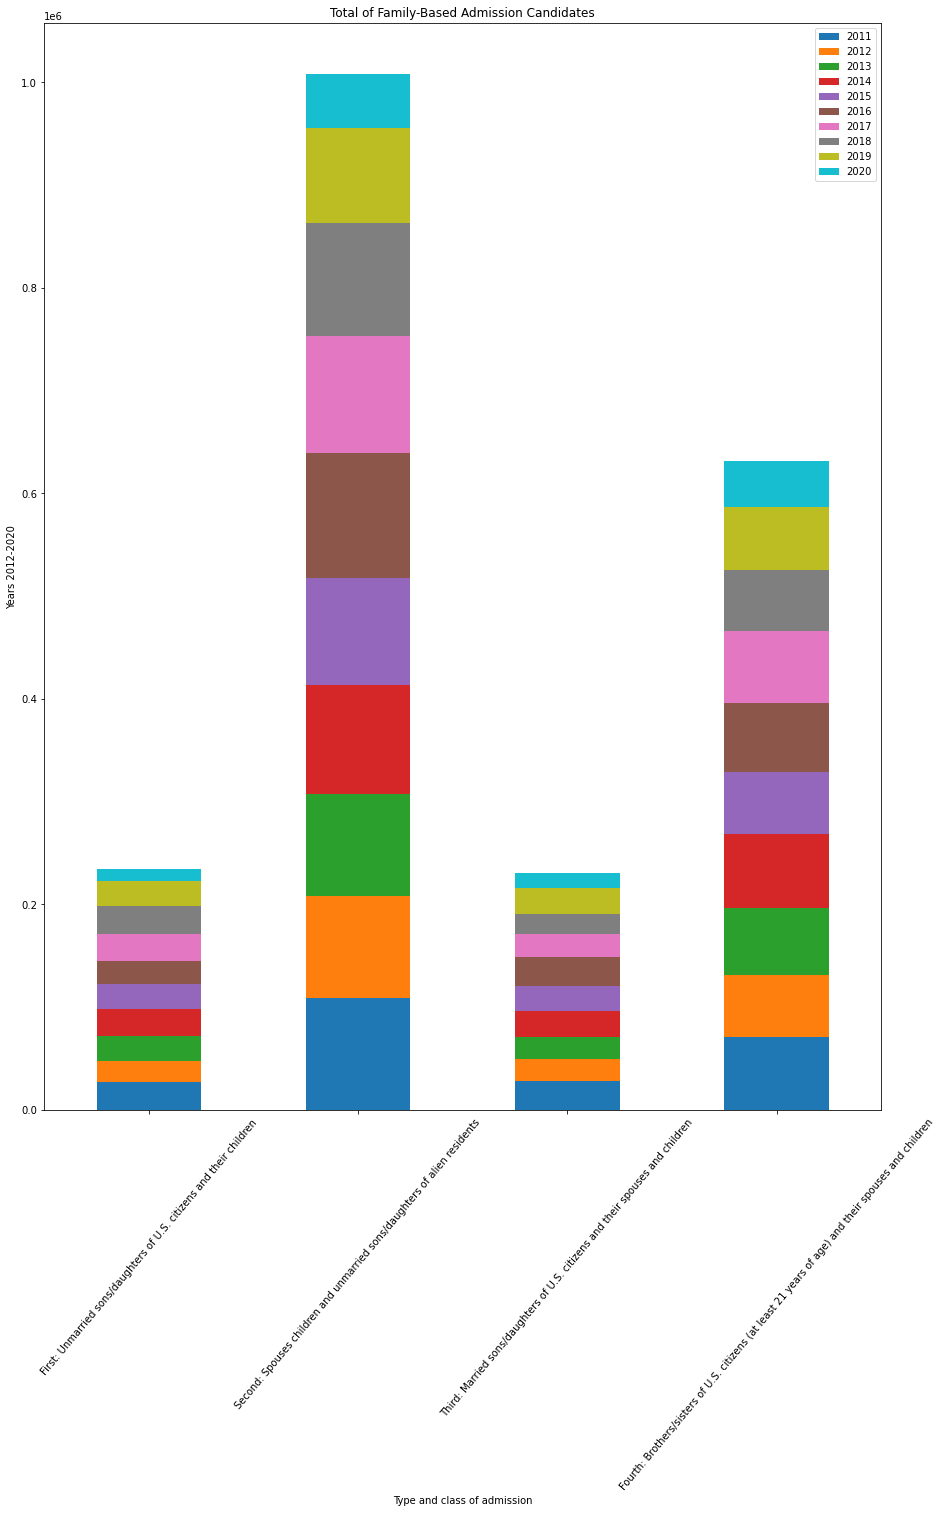

In [126]:
total_fam_related_df.plot.bar(stacked = True, title="Total of Family-Based Admission Candidates", ylabel="Years 2012-2020", figsize=(15, 20), rot=50)

savename = "Total of Family-Based Admission Candidates.svg"
plt.savefig("Images/"+ savename, bbox_inches='tight')

savename = "Total of Family-Based Admission Candidates.png"
plt.savefig("Images/"+ savename, bbox_inches='tight')

In [127]:
total_career_related_file = os.path.join("Outputs", "Total Career Related.csv")
total_career_related_df = pd.read_csv(total_career_related_file, index_col=0)

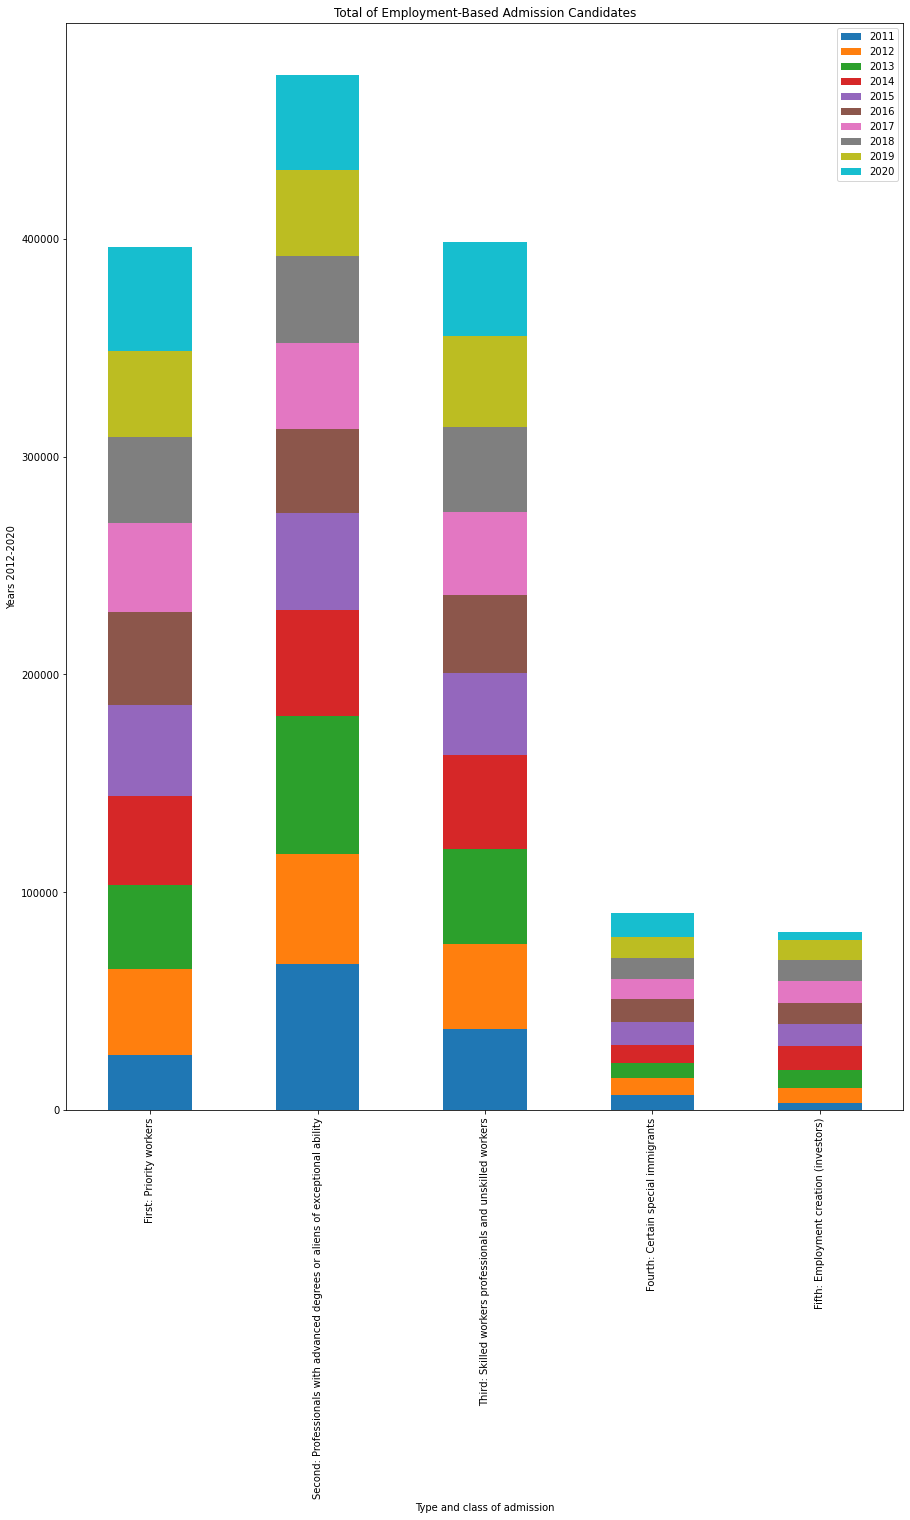

In [128]:
total_career_related_df.plot.bar(stacked = True, title="Total of Employment-Based Admission Candidates", ylabel="Years 2012-2020", figsize=(15, 20))

savename = "Total of Employment-Based Admission Candidates.svg"
plt.savefig("Images/"+ savename, bbox_inches='tight')

savename = "Total of Employment-Based Admission Candidates.png"
plt.savefig("Images/"+ savename, bbox_inches='tight')

In [129]:
diff_file = os.path.join("Outputs", "Difference.csv")
diff_df = pd.read_csv(diff_file, index_col=0)

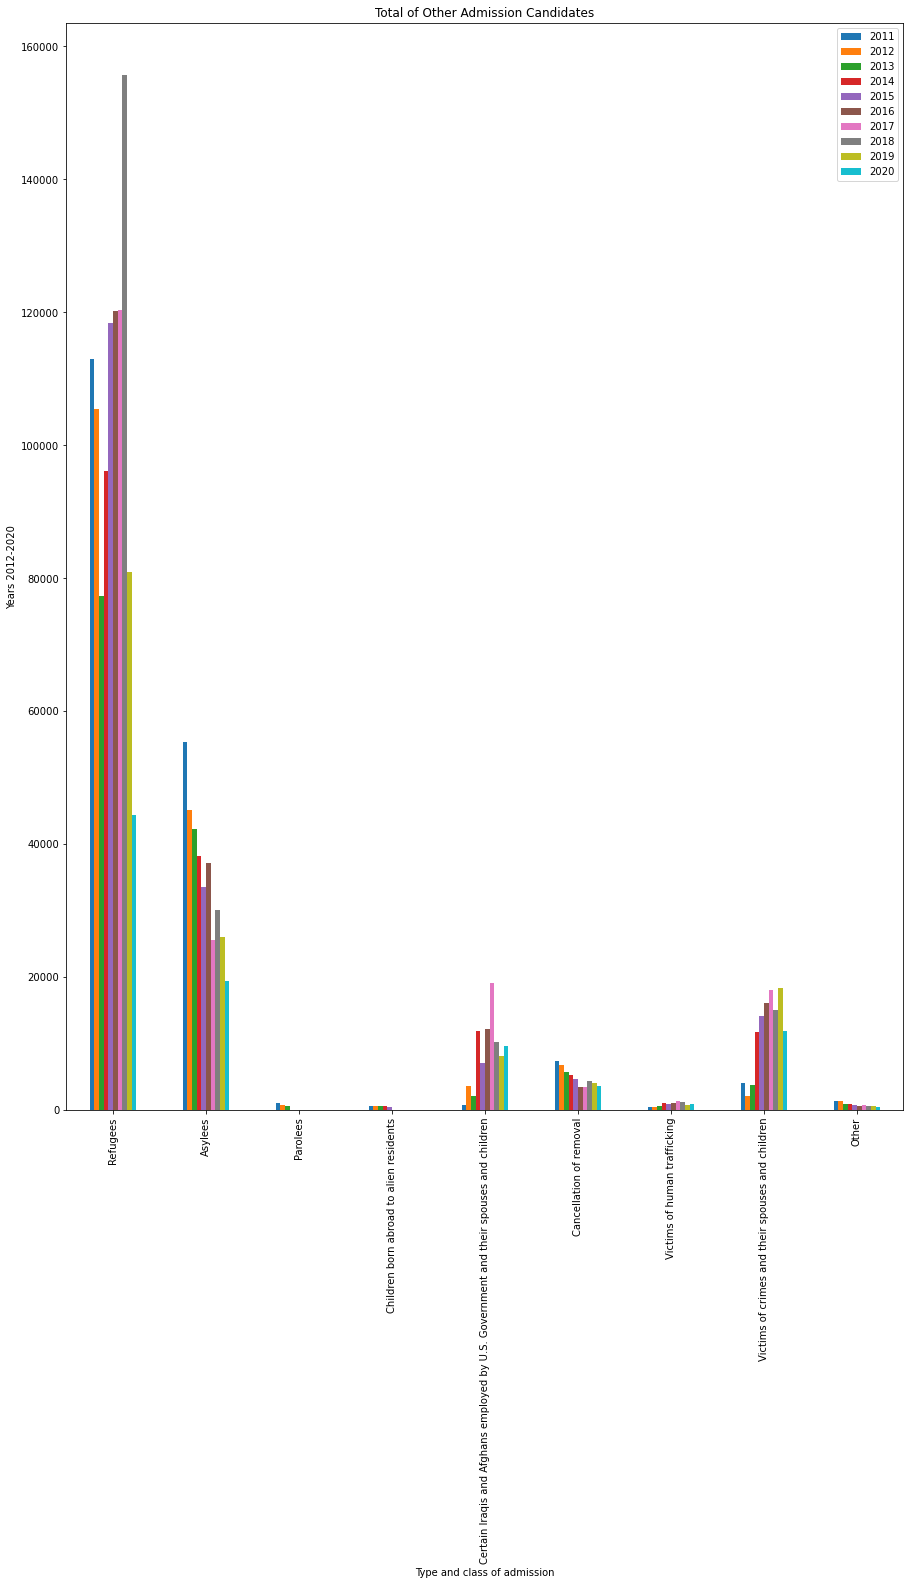

In [130]:
diff_df.plot.bar(title="Total of Other Admission Candidates", ylabel="Years 2012-2020", figsize=(15, 20))

savename = "Total of Other Admission Candidates.svg"
plt.savefig("Images/"+ savename, bbox_inches='tight')

savename = "Total of Other Admission Candidates.png"
plt.savefig("Images/"+ savename, bbox_inches='tight')

In [131]:
sum_fam_file = os.path.join("Outputs", "Total Family-Related Admission.csv")
sum_fam_df = pd.read_csv(sum_fam_file, index_col=0)

sum_job_file = os.path.join("Outputs", "Total Career-Related Admission.csv")
sum_job_df = pd.read_csv(sum_job_file, index_col=0)

sum_total_other_file = os.path.join("Outputs", "Total All Other Admission.csv")
sum_total_other_df = pd.read_csv(sum_total_other_file, index_col=0)

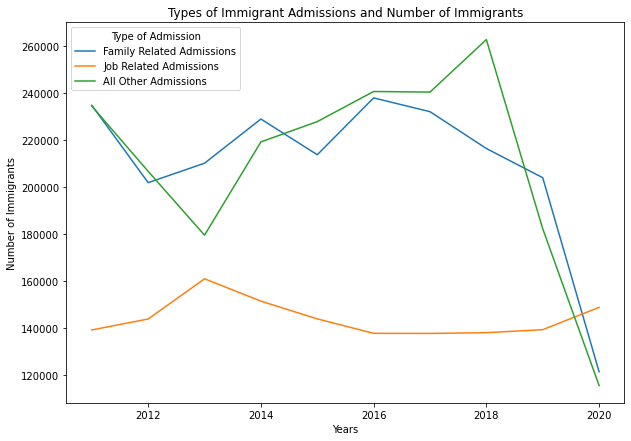

In [132]:
plt.figure(figsize=(10,7))
plt.title("Types of Immigrant Admissions and Number of Immigrants")
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')
plt.plot(sum_fam_df, label="Family Related Admissions")
plt.plot(sum_job_df, label="Job Related Admissions")
plt.plot(sum_total_other_df, label="All Other Admissions")
plt.legend()
plt.legend(title="Type of Admission", ncol=1, loc="upper left")

savename = "Immigrant Admissions.svg"
plt.savefig("Images/"+ savename, bbox_inches='tight')

savename = "Immigrant Admissions.png"
plt.savefig("Images/"+ savename, bbox_inches='tight')

## The Effects Covid had on Immigrations by Regions and Age Groups

In [133]:
#Import all Lawful and Naturalization files for the age group files and the total by region
lawful_age_group_16_to20_2018_file = os.path.join("Outputs\Lawful age group 16 to 20 2018.csv")
lawful_age_group_16_to20_2018 = pd.read_csv(lawful_age_group_16_to20_2018_file, index_col=0)

lawful_age_group_16_to20_2019_file = os.path.join("Outputs\Lawful age group 16 to 20 2019.csv")
lawful_age_group_16_to20_2019 = pd.read_csv(lawful_age_group_16_to20_2019_file, index_col=0)

lawful_age_group_16_to20_2020_file = os.path.join("Outputs\Lawful age group 16 to 20 2020.csv")
lawful_age_group_16_to20_2020 = pd.read_csv(lawful_age_group_16_to20_2020_file, index_col=0)

lawful_age_group_over_21_2018_file = os.path.join("Outputs\Lawful age group over 21 2018.csv")
lawful_age_group_over_21_2018 = pd.read_csv(lawful_age_group_over_21_2018_file, index_col=0)

lawful_age_group_over_21_2019_file = os.path.join("Outputs\Lawful age group over 21 2019.csv")
lawful_age_group_over_21_2019 = pd.read_csv(lawful_age_group_over_21_2019_file, index_col=0)

lawful_age_group_over_21_2020_file = os.path.join("Outputs\Lawful age group over 21 2020.csv")
lawful_age_group_over_21_2020 = pd.read_csv(lawful_age_group_over_21_2020_file, index_col=0)

lawful_age_group_under_16_2018_file = os.path.join("Outputs\Lawful age group under 16 2018.csv")
lawful_age_group_under_16_2018 = pd.read_csv(lawful_age_group_under_16_2018_file, index_col=0)

lawful_age_group_under_16_2019_file = os.path.join("Outputs\Lawful age group under 16 2019.csv")
lawful_age_group_under_16_2019 = pd.read_csv(lawful_age_group_under_16_2019_file, index_col=0)

lawful_age_group_under_16_2020_file = os.path.join("Outputs\Lawful age group under 16 2020.csv")
lawful_age_group_under_16_2020 = pd.read_csv(lawful_age_group_under_16_2020_file, index_col=0)

lawful_total_age_group_2018_file = os.path.join("Outputs\Lawful Total age group 2018.csv")
lawful_total_age_group_2018 = pd.read_csv(lawful_total_age_group_2018_file, index_col=0)

lawful_total_age_group_2019_file = os.path.join("Outputs\Lawful Total age group 2019.csv")
lawful_total_age_group_2019 = pd.read_csv(lawful_total_age_group_2019_file, index_col=0)

lawful_total_age_group_2020_file = os.path.join("Outputs\Lawful Total age group 2020.csv")
lawful_total_age_group_2020 = pd.read_csv(lawful_total_age_group_2020_file, index_col=0)

lawful_total_africa_file = os.path.join("Outputs\Lawful Total for Africa.csv")
lawful_total_africa = pd.read_csv(lawful_total_africa_file, index_col=0)

lawful_total_asia_file = os.path.join("Outputs\Lawful Total for Asia.csv")
lawful_total_asia = pd.read_csv(lawful_total_asia_file, index_col=0)

lawful_total_europe_file = os.path.join("Outputs\Lawful Total for Europe.csv")
lawful_total_europe = pd.read_csv(lawful_total_europe_file, index_col=0) 

lawful_total_oceania_file = os.path.join("Outputs\Lawful Total for Oceania.csv")
lawful_total_oceania = pd.read_csv(lawful_total_oceania_file, index_col=0)

lawful_total_NA_file = os.path.join("Outputs\Lawful Total for North America.csv")
lawful_total_NA = pd.read_csv(lawful_total_NA_file, index_col=0)

lawful_total_SA_file = os.path.join("Outputs\Lawful Total for South America.csv")
lawful_total_SA = pd.read_csv(lawful_total_SA_file, index_col=0)

lawful_total_unknown_file = os.path.join("Outputs\Lawful Total for Unknown.csv")
lawful_total_unknown = pd.read_csv(lawful_total_unknown_file, index_col=0)

lawful_total_year_file = os.path.join("Outputs\Lawful Total for Year's.csv")
lawful_total_year = pd.read_csv(lawful_total_year_file, index_col=0)


nat_age_group_16_to20_2018_file = os.path.join("Outputs","Naturalized age group under 16 2018.csv")
nat_age_group_16_to20_2018 = pd.read_csv(nat_age_group_16_to20_2018_file, index_col=0)

nat_age_group_16_to20_2019_file = os.path.join("Outputs","Naturalized age group 16 to 20 2019.csv")
nat_age_group_16_to20_2019 = pd.read_csv(nat_age_group_16_to20_2019_file, index_col=0)

nat_age_group_16_to20_2020_file = os.path.join("Outputs","Naturalized age group 16 to 20 2020.csv")
nat_age_group_16_to20_2020 = pd.read_csv(nat_age_group_16_to20_2020_file, index_col=0)

nat_age_group_over_21_2018_file = os.path.join("Outputs","Naturalized age group over 21 2018.csv")
nat_age_group_over_21_2018 = pd.read_csv(nat_age_group_over_21_2018_file, index_col=0)

nat_age_group_over_21_2019_file = os.path.join("Outputs","Naturalized age group over 21 2019.csv")
nat_age_group_over_21_2019 = pd.read_csv(nat_age_group_over_21_2019_file, index_col=0)

nat_age_group_over_21_2020_file = os.path.join("Outputs","Naturalized age group over 21 2020.csv")
nat_age_group_over_21_2020 = pd.read_csv(nat_age_group_over_21_2020_file, index_col=0)

nat_age_group_under_16_2018_file = os.path.join("Outputs","Naturalized age group under 16 2018.csv")
nat_age_group_under_16_2018 = pd.read_csv(nat_age_group_under_16_2018_file, index_col=0)

nat_age_group_under_16_2019_file = os.path.join("Outputs","Naturalized age group under 16 2019.csv")
nat_age_group_under_16_2019 = pd.read_csv(nat_age_group_under_16_2019_file, index_col=0)

nat_age_group_under_16_2020_file = os.path.join("Outputs","Naturalized age group under 16 2020.csv")
nat_age_group_under_16_2020 = pd.read_csv(nat_age_group_under_16_2020_file, index_col=0)

nat_total_age_group_2018_file = os.path.join("Outputs","Naturalized Total age group 2018.csv")
nat_total_age_group_2018 = pd.read_csv(nat_total_age_group_2018_file, index_col=0)

nat_total_age_group_2019_file = os.path.join("Outputs","Naturalized Total age group 2019.csv")
nat_total_age_group_2019 = pd.read_csv(nat_total_age_group_2019_file, index_col=0)

nat_total_age_group_2020_file = os.path.join("Outputs","Naturalized Total age group 2020.csv")
nat_total_age_group_2020 = pd.read_csv(nat_total_age_group_2020_file, index_col=0)

nat_total_africa_file = os.path.join("Outputs\Total for Africa.csv")
nat_total_africa = pd.read_csv(nat_total_africa_file, index_col=0)

nat_total_asia_file = os.path.join("Outputs\Total for Asia.csv")
nat_total_asia = pd.read_csv(nat_total_asia_file, index_col=0)

nat_total_europe_file = os.path.join("Outputs\Total for Europe.csv")
nat_total_europe = pd.read_csv(nat_total_europe_file, index_col=0) 

nat_total_oceania_file = os.path.join("Outputs\Total for Oceania.csv")
nat_total_oceania = pd.read_csv(nat_total_oceania_file, index_col=0)

nat_total_NA_file = os.path.join("Outputs\Total for North America.csv")
nat_total_NA = pd.read_csv(nat_total_NA_file, index_col=0)

nat_total_SA_file = os.path.join("Outputs\Total for South America.csv")
nat_total_SA = pd.read_csv(nat_total_SA_file, index_col=0)

nat_total_unknown_file = os.path.join("Outputs\Total for Unknown.csv")
nat_total_unknown = pd.read_csv(nat_total_unknown_file, index_col=0)

nat_total_year_file = os.path.join("Outputs\Total for Year's.csv")
nat_total_year = pd.read_csv(nat_total_year_file, index_col=0)

In [134]:
#make each year's value callable.
nat_africa_2018 = nat_total_africa.iloc[0][7]
nat_africa_2019 = nat_total_africa.iloc[0][8]
nat_africa_2020 = nat_total_africa.iloc[0][9]

nat_asia_2018 = nat_total_asia.iloc[0][7]
nat_asia_2019 = nat_total_asia.iloc[0][8]
nat_asia_2020 = nat_total_asia.iloc[0][9]

nat_europe_2018 = nat_total_europe.iloc[0][7]
nat_europe_2019 = nat_total_europe.iloc[0][8]
nat_europe_2020 = nat_total_europe.iloc[0][9]

nat_NA_2018 = nat_total_NA.iloc[0][7]
nat_NA_2019 = nat_total_NA.iloc[0][8]
nat_NA_2020 = nat_total_NA.iloc[0][9]

nat_SA_2018 = nat_total_SA.iloc[0][7]
nat_SA_2019 = nat_total_SA.iloc[0][8]
nat_SA_2020 = nat_total_SA.iloc[0][9]

nat_oceania_2018 = nat_total_oceania.iloc[0][7]
nat_oceania_2019 = nat_total_oceania.iloc[0][8]
nat_oceania_2020 = nat_total_oceania.iloc[0][9]

nat_unknown_2018 = nat_total_unknown.iloc[0][7]
nat_unknown_2019 = nat_total_unknown.iloc[0][8]
nat_unknown_2020 = nat_total_unknown.iloc[0][9]

nat_total_2018 = nat_total_year.iloc[0][7]
nat_total_2019 = nat_total_year.iloc[0][8]
nat_total_2020 = nat_total_year.iloc[0][9]

In [135]:
#make each year's value callable.
lawful_africa_2018 = lawful_total_africa.iloc[0][7]
lawful_africa_2019 = lawful_total_africa.iloc[0][8]
lawful_africa_2020 = lawful_total_africa.iloc[0][9]

lawful_asia_2018 = lawful_total_asia.iloc[0][7]
lawful_asia_2019 = lawful_total_asia.iloc[0][8]
lawful_asia_2020 = lawful_total_asia.iloc[0][9]

lawful_europe_2018 = lawful_total_europe.iloc[0][7]
lawful_europe_2019 = lawful_total_europe.iloc[0][8]
lawful_europe_2020 = lawful_total_europe.iloc[0][9]

lawful_NA_2018 = lawful_total_NA.iloc[0][7]
lawful_NA_2019 = lawful_total_NA.iloc[0][8]
lawful_NA_2020 = lawful_total_NA.iloc[0][9]

lawful_SA_2018 = lawful_total_SA.iloc[0][7]
lawful_SA_2019 = lawful_total_SA.iloc[0][8]
lawful_SA_2020 = lawful_total_SA.iloc[0][9]

lawful_oceania_2018 = lawful_total_oceania.iloc[0][7]
lawful_oceania_2019 = lawful_total_oceania.iloc[0][8]
lawful_oceania_2020 = lawful_total_oceania.iloc[0][9]

lawful_unknown_2018 = lawful_total_unknown.iloc[0][7]
lawful_unknown_2019 = lawful_total_unknown.iloc[0][8]
lawful_unknown_2020 = lawful_total_unknown.iloc[0][9]

lawful_total_2018 = lawful_total_year.iloc[0][7]
lawful_total_2019 = lawful_total_year.iloc[0][8]
lawful_total_2020 = lawful_total_year.iloc[0][9]

In [136]:
#calculate the growth or loss rate for each country
nat_africa_2018_2019_rate = (((nat_africa_2019 - nat_africa_2018)/nat_africa_2018)*100)
nat_africa_2019_2020_rate = (((nat_africa_2020 - nat_africa_2019)/nat_africa_2019)*100)

nat_asia_2018_2019_rate = ((nat_asia_2019 - nat_asia_2018)/nat_asia_2018)*100
nat_asia_2019_2020_rate = ((nat_asia_2020 - nat_asia_2019)/nat_asia_2019)*100


nat_europe_2018_2019_rate = ((nat_europe_2019 - nat_europe_2018)/nat_europe_2018)*100
nat_europe_2019_2020_rate = ((nat_europe_2020 - nat_europe_2019)/nat_europe_2019)*100


nat_NA_2018_2019_rate = ((nat_NA_2019 - nat_NA_2018)/nat_NA_2018)*100
nat_NA_2019_2020_rate = ((nat_NA_2020 - nat_NA_2019)/nat_NA_2019)*100


nat_SA_2018_2019_rate = ((nat_SA_2019 - nat_SA_2018)/nat_SA_2018)*100
nat_SA_2019_2020_rate = ((nat_SA_2020 - nat_SA_2019)/nat_SA_2019)*100


nat_oceania_2018_2019_rate = ((nat_oceania_2019 - nat_oceania_2018)/nat_oceania_2018)*100
nat_oceania_2019_2020_rate = ((nat_oceania_2020 - nat_oceania_2019)/nat_oceania_2019)*100

nat_unknown_2018_2019_rate = ((nat_unknown_2019 - nat_unknown_2018)/nat_unknown_2018)*100
nat_unknown_2019_2020_rate = ((nat_unknown_2020 - nat_unknown_2019)/nat_unknown_2019)*100

nat_totalyear_2018_2019_rate = ((nat_total_2019 - nat_total_2018)/nat_total_2018)*100
nat_totalyear_2019_2020_rate = ((nat_total_2020 - nat_total_2019)/nat_total_2019)*100

In [137]:
#Create a DataFrame of the calculated rates from each Region
nat_2018to2019_rate = {'Region': ['Total', 'Africa', 'Asia', 'Europe', 'Oceania', 'North America', 'South America', 'Unknown'], '2018 to 2019 growth or lose rate': [nat_totalyear_2018_2019_rate, nat_africa_2018_2019_rate, nat_asia_2018_2019_rate, nat_europe_2018_2019_rate, nat_oceania_2018_2019_rate, nat_NA_2018_2019_rate, nat_SA_2018_2019_rate, nat_unknown_2018_2019_rate]}
nat_2019to2020_rate = {'Region': ['Total', 'Africa', 'Asia', 'Europe', 'Oceania', 'North America', 'South America', 'Unknown'], '2019 to 2020 growth or lose rate': [nat_totalyear_2019_2020_rate, nat_africa_2019_2020_rate, nat_asia_2019_2020_rate, nat_europe_2019_2020_rate, nat_oceania_2019_2020_rate, nat_NA_2019_2020_rate, nat_SA_2019_2020_rate, nat_unknown_2019_2020_rate]}

nat_2018to2019_df=pd.DataFrame(nat_2018to2019_rate)
nat_2018to2019_df = nat_2018to2019_df.set_index('Region')

nat_2019to2020_df=pd.DataFrame(nat_2019to2020_rate)
nat_2019to2020_df = nat_2019to2020_df.set_index('Region')

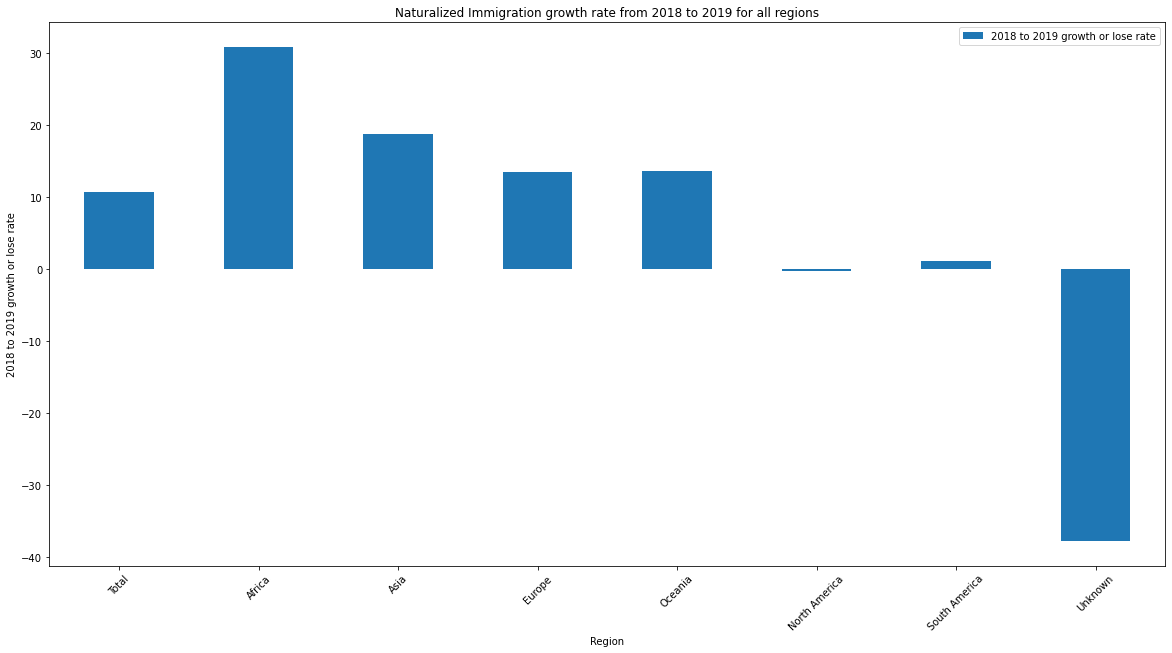

In [138]:
#Plot the DataFrame for 2018 to 2019 by regions
nat_2018to2019_df.plot.bar(title="Naturalized Immigration growth rate from 2018 to 2019 for all regions", ylabel="2018 to 2019 growth or lose rate", figsize=(20, 10), rot=45)

savename = "naturalized growth rate from 2018 to 2019 for all regions.svg"
plt.savefig("Images/"+ savename, bbox_inches='tight')

savename = "naturalized growth rate from 2018 to 2019 for all regions.png"
plt.savefig("Images/"+ savename, bbox_inches='tight')

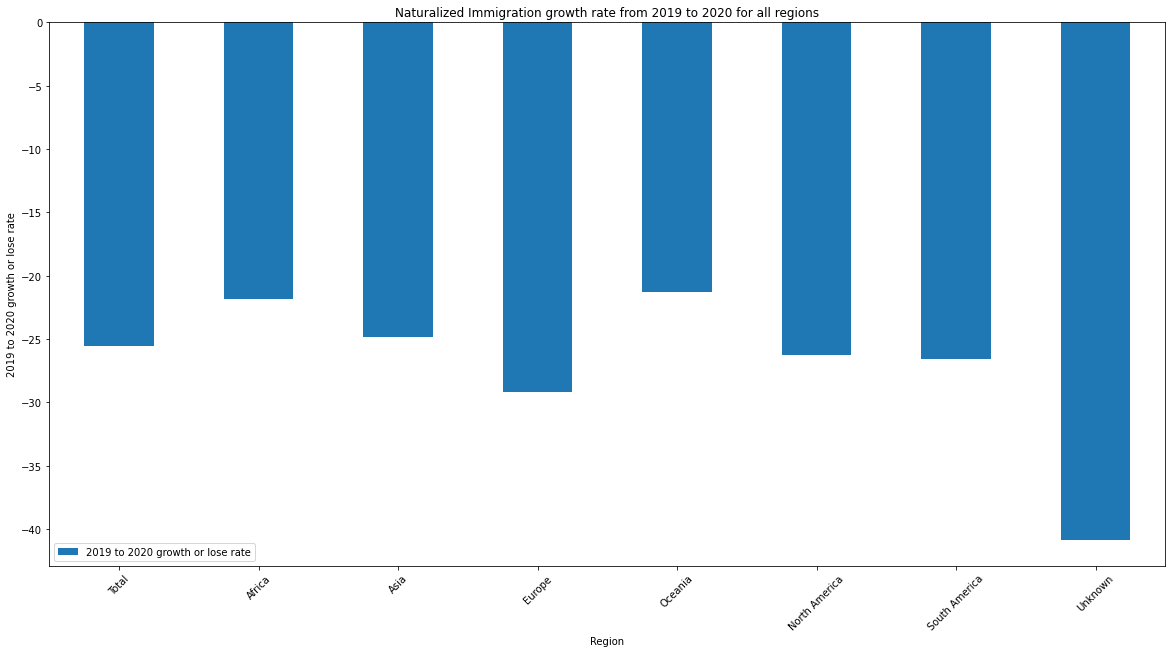

In [139]:
#Plot the DataFrame for 2019 to 2020 by regions
nat_2019to2020_df.plot.bar(title="Naturalized Immigration growth rate from 2019 to 2020 for all regions", ylabel="2019 to 2020 growth or lose rate", figsize=(20, 10), rot=45)

savename = "naturalized growth rate from 2019 to 2020 for all regions.svg"
plt.savefig("Images/"+ savename, bbox_inches='tight')

savename = "naturalized growth rate from 2019 to 2020 for all regions.png"
plt.savefig("Images/"+ savename, bbox_inches='tight')

In [140]:
#calculate the growth or loss rate for each country
lawful_africa_2018_2019_rate = ((lawful_africa_2019 - lawful_africa_2018)/lawful_africa_2018)*100
lawful_africa_2019_2020_rate = ((lawful_africa_2020 - lawful_africa_2019)/lawful_africa_2019)*100

lawful_asia_2018_2019_rate = ((lawful_asia_2019 - lawful_asia_2018)/lawful_asia_2018)*100
lawful_asia_2019_2020_rate = ((lawful_asia_2020 - lawful_asia_2019)/lawful_asia_2019)*100


lawful_europe_2018_2019_rate = ((lawful_europe_2019 - lawful_europe_2018)/lawful_europe_2018)*100
lawful_europe_2019_2020_rate = ((lawful_europe_2020 - lawful_europe_2019)/lawful_europe_2019)*100


lawful_NA_2018_2019_rate = ((lawful_NA_2019 - lawful_NA_2018)/lawful_NA_2018)*100
lawful_NA_2019_2020_rate = ((lawful_NA_2020 - lawful_NA_2019)/lawful_NA_2019)*100


lawful_SA_2018_2019_rate = ((lawful_SA_2019 - lawful_SA_2018)/lawful_SA_2018)*100
lawful_SA_2019_2020_rate = ((lawful_SA_2020 - lawful_SA_2019)/lawful_SA_2019)*100

lawful_oceania_2018_2019_rate = ((lawful_oceania_2019 - lawful_oceania_2018)/lawful_oceania_2018)*100
lawful_oceania_2019_2020_rate = ((lawful_oceania_2020 - lawful_oceania_2019)/lawful_oceania_2019)*100

lawful_unknown_2018_2019_rate = ((lawful_unknown_2019 - lawful_unknown_2018)/lawful_unknown_2018)*100
lawful_unknown_2019_2020_rate = ((lawful_unknown_2020 - lawful_unknown_2019)/lawful_unknown_2019)*100

lawful_totalyear_2018_2019_rate = ((lawful_total_2019 - lawful_total_2018)/lawful_total_2018)*100
lawful_totalyear_2019_2020_rate = ((lawful_total_2020 - lawful_total_2019)/lawful_total_2019)*100

In [141]:
#Create a DataFrame of the calculated rates from each Region
lawful_2018to2019_rate = {'Region': ['Total', 'Africa', 'Asia', 'Europe', 'Oceania', 'North America', 'South America', 'Unknown'], '2018 to 2019 growth or lose rate': [lawful_totalyear_2018_2019_rate, lawful_africa_2018_2019_rate, lawful_asia_2018_2019_rate, lawful_europe_2018_2019_rate, lawful_oceania_2018_2019_rate, lawful_NA_2018_2019_rate, lawful_SA_2018_2019_rate, lawful_unknown_2018_2019_rate]}
lawful_2019to2020_rate = {'Region': ['Total', 'Africa', 'Asia', 'Europe', 'Oceania', 'North America', 'South America', 'Unknown'], '2019 to 2020 growth or lose rate': [lawful_totalyear_2019_2020_rate, lawful_africa_2019_2020_rate, lawful_asia_2019_2020_rate, lawful_europe_2019_2020_rate, lawful_oceania_2019_2020_rate, lawful_NA_2019_2020_rate, lawful_SA_2019_2020_rate, lawful_unknown_2019_2020_rate]}

lawful_2018to2019_df=pd.DataFrame(lawful_2018to2019_rate)
lawful_2018to2019_df = lawful_2018to2019_df.set_index('Region')

lawful_2019to2020_df=pd.DataFrame(lawful_2019to2020_rate)
lawful_2019to2020_df = lawful_2019to2020_df.set_index('Region')

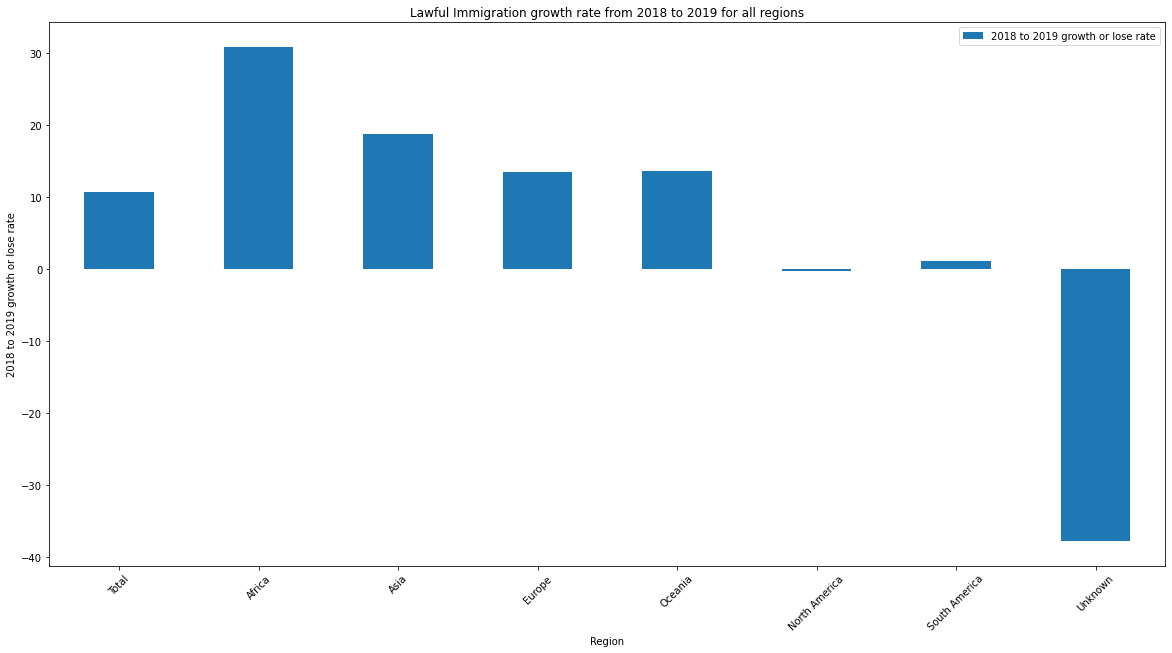

In [142]:
#Plot the DataFrame for 2019 to 2020 by regions
lawful_2018to2019_df.plot.bar(title="Lawful Immigration growth rate from 2018 to 2019 for all regions", ylabel="2018 to 2019 growth or lose rate", figsize=(20, 10), rot=45)

savename = "Lawful growth rate from 2018 to 2019 for all regions.svg"
plt.savefig("Images/"+ savename, bbox_inches='tight')

savename = "Lawful growth rate from 2018 to 2019 for all regions.png"
plt.savefig("Images/"+ savename, bbox_inches='tight')

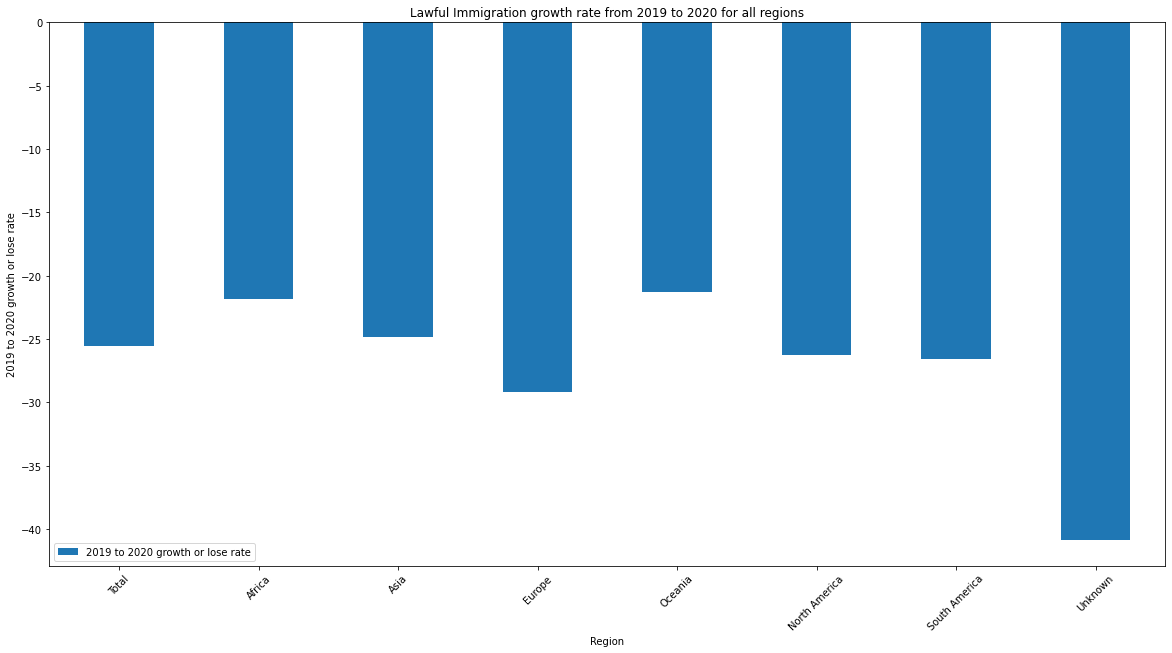

In [143]:
#Plot the DataFrame for 2019 to 2020 by regions
lawful_2019to2020_df.plot.bar(title="Lawful Immigration growth rate from 2019 to 2020 for all regions", ylabel="2019 to 2020 growth or lose rate", figsize=(20, 10), rot=45)

savename = "Lawful growth rate from 2019 to 2020 for all regions.svg"
plt.savefig("Images/"+ savename, bbox_inches='tight')

savename = "Lawful growth rate from 2019 to 2020 for all regions.png"
plt.savefig("Images/"+ savename, bbox_inches='tight')

In [144]:
#make each value callable
nat_total_group_16to20_2018 = nat_age_group_16_to20_2018.iloc[0][0]
nat_total_group_16to20_2019 = nat_age_group_16_to20_2019.iloc[0][0]
nat_total_group_16to20_2020 = nat_age_group_16_to20_2020.iloc[0][0]

nat_fem_group_16to20_2018 = nat_age_group_16_to20_2018.iloc[0][1]
nat_fem_group_16to20_2019 = nat_age_group_16_to20_2019.iloc[0][1]
nat_fem_group_16to20_2020 = nat_age_group_16_to20_2020.iloc[0][1]

nat_male_group_16to20_2018 = nat_age_group_16_to20_2018.iloc[0][2]
nat_male_group_16to20_2019 = nat_age_group_16_to20_2019.iloc[0][2]
nat_male_group_16to20_2020 = nat_age_group_16_to20_2020.iloc[0][2]


nat_total_group_under16_2018 = nat_age_group_under_16_2018.iloc[0][0]
nat_total_group_under16_2019 = nat_age_group_under_16_2019.iloc[0][0]
nat_total_group_under16_2020 = nat_age_group_under_16_2020.iloc[0][0]

nat_fem_group_under16_2018 = nat_age_group_under_16_2018.iloc[0][1]
nat_fem_group_under16_2019 = nat_age_group_under_16_2019.iloc[0][1]
nat_fem_group_under16_2020 = nat_age_group_under_16_2020.iloc[0][1]

nat_male_group_under16_2018 = nat_age_group_under_16_2018.iloc[0][2]
nat_male_group_under16_2019 = nat_age_group_under_16_2019.iloc[0][2]
nat_male_group_under16_2020 = nat_age_group_under_16_2020.iloc[0][2]


nat_total_group_over21_2018 = nat_age_group_over_21_2018.iloc[0][0]
nat_total_group_over21_2019 = nat_age_group_over_21_2019.iloc[0][0]
nat_total_group_over21_2020 = nat_age_group_over_21_2020.iloc[0][0]

nat_fem_group_over21_2018 = nat_age_group_over_21_2018.iloc[0][1]
nat_fem_group_over21_2019 = nat_age_group_over_21_2019.iloc[0][1]
nat_fem_group_over21_2020 = nat_age_group_over_21_2020.iloc[0][1]

nat_male_group_over21_2018 = nat_age_group_over_21_2018.iloc[0][2]
nat_male_group_over21_2019 = nat_age_group_over_21_2019.iloc[0][2]
nat_male_group_over21_2020 = nat_age_group_over_21_2020.iloc[0][2]

In [145]:
#make each value callable
lawful_total_group_16to20_2018 = lawful_age_group_16_to20_2018.iloc[0][0]
lawful_total_group_16to20_2019 = lawful_age_group_16_to20_2019.iloc[0][0]
lawful_total_group_16to20_2020 = lawful_age_group_16_to20_2020.iloc[0][0]

lawful_fem_group_16to20_2018 = lawful_age_group_16_to20_2018.iloc[0][1]
lawful_fem_group_16to20_2019 = lawful_age_group_16_to20_2019.iloc[0][1]
lawful_fem_group_16to20_2020 = lawful_age_group_16_to20_2020.iloc[0][1]

lawful_male_group_16to20_2018 = lawful_age_group_16_to20_2018.iloc[0][2]
lawful_male_group_16to20_2019 = lawful_age_group_16_to20_2019.iloc[0][2]
lawful_male_group_16to20_2020 = lawful_age_group_16_to20_2020.iloc[0][2]


lawful_total_group_under16_2018 = lawful_age_group_under_16_2018.iloc[0][0]
lawful_total_group_under16_2019 = lawful_age_group_under_16_2019.iloc[0][0]
lawful_total_group_under16_2020 = lawful_age_group_under_16_2020.iloc[0][0]

lawful_fem_group_under16_2018 = lawful_age_group_under_16_2018.iloc[0][1]
lawful_fem_group_under16_2019 = lawful_age_group_under_16_2019.iloc[0][1]
lawful_fem_group_under16_2020 = lawful_age_group_under_16_2020.iloc[0][1]

lawful_male_group_under16_2018 = lawful_age_group_under_16_2018.iloc[0][2]
lawful_male_group_under16_2019 = lawful_age_group_under_16_2019.iloc[0][2]
lawful_male_group_under16_2020 = lawful_age_group_under_16_2020.iloc[0][2]


lawful_total_group_over21_2018 = lawful_age_group_over_21_2018.iloc[0][0]
lawful_total_group_over21_2019 = lawful_age_group_over_21_2019.iloc[0][0]
lawful_total_group_over21_2020 = lawful_age_group_over_21_2020.iloc[0][0]

lawful_fem_group_over21_2018 = lawful_age_group_over_21_2018.iloc[0][1]
lawful_fem_group_over21_2019 = lawful_age_group_over_21_2019.iloc[0][1]
lawful_fem_group_over21_2020 = lawful_age_group_over_21_2020.iloc[0][1]

lawful_male_group_over21_2018 = lawful_age_group_over_21_2018.iloc[0][2]
lawful_male_group_over21_2019 = lawful_age_group_over_21_2019.iloc[0][2]
lawful_male_group_over21_2020 = lawful_age_group_over_21_2020.iloc[0][2]

In [146]:
#calculate the rate for each gender
lawful_total_16to20_2018_2019_rate = ((lawful_total_group_16to20_2019 - lawful_total_group_16to20_2018)/lawful_total_group_16to20_2018)*100
lawful_total_16to20_2019_2020_rate = ((lawful_total_group_16to20_2020 - lawful_total_group_16to20_2019)/lawful_total_group_16to20_2019)*100

lawful_total_over21_2018_2019_rate = ((lawful_total_group_over21_2019 - lawful_total_group_over21_2018)/lawful_total_group_over21_2018)*100
lawful_total_over21_2019_2020_rate = ((lawful_total_group_over21_2020 - lawful_total_group_over21_2019)/lawful_total_group_over21_2019)*100

lawful_total_under16_2018_2019_rate = ((lawful_total_group_under16_2019 - lawful_total_group_under16_2018)/lawful_total_group_under16_2018)*100
lawful_total_under16_2019_2020_rate = ((lawful_total_group_under16_2020 - lawful_total_group_under16_2019)/lawful_total_group_under16_2019)*100


lawful_fem_16to20_2018_2019_rate = ((lawful_fem_group_16to20_2019 - lawful_fem_group_16to20_2018)/lawful_fem_group_16to20_2018)*100
lawful_fem_16to20_2019_2020_rate = ((lawful_fem_group_16to20_2020 - lawful_fem_group_16to20_2019)/lawful_fem_group_16to20_2019)*100

lawful_fem_over21_2018_2019_rate = ((lawful_fem_group_over21_2019 - lawful_fem_group_over21_2018)/lawful_fem_group_over21_2018)*100
lawful_fem_over21_2019_2020_rate = ((lawful_fem_group_over21_2020 - lawful_fem_group_over21_2019)/lawful_fem_group_over21_2019)*100

lawful_fem_under16_2018_2019_rate = ((lawful_fem_group_under16_2019 - lawful_fem_group_under16_2018)/lawful_fem_group_under16_2018)*100
lawful_fem_under16_2019_2020_rate = ((lawful_fem_group_under16_2020 - lawful_fem_group_under16_2019)/lawful_fem_group_under16_2019)*100


lawful_male_16to20_2018_2019_rate = ((lawful_male_group_16to20_2019 - lawful_male_group_16to20_2018)/lawful_male_group_16to20_2018)*100
lawful_male_16to20_2019_2020_rate = ((lawful_male_group_16to20_2020 - lawful_male_group_16to20_2019)/lawful_male_group_16to20_2019)*100

lawful_male_over21_2018_2019_rate = ((lawful_male_group_over21_2019 - lawful_male_group_over21_2018)/lawful_male_group_over21_2018)*100
lawful_male_over21_2019_2020_rate = ((lawful_male_group_over21_2020 - lawful_male_group_over21_2019)/lawful_male_group_over21_2019)*100

lawful_male_under16_2018_2019_rate = ((lawful_male_group_under16_2019 - lawful_male_group_under16_2018)/lawful_male_group_under16_2018)*100
lawful_male_under16_2019_2020_rate = ((lawful_male_group_under16_2020 - lawful_male_group_under16_2019)/lawful_male_group_under16_2019)*100

In [147]:
#Create a DataFrame of the calculated rates by each age group
lawful_age_group_2018to2019_rate = {'Age Group': ['Under 16 years', '16 to 20 years', '21 years and over'], 'Total': [lawful_total_under16_2018_2019_rate, lawful_total_16to20_2018_2019_rate, lawful_total_over21_2018_2019_rate],\
     'Female': [lawful_fem_under16_2018_2019_rate, lawful_fem_16to20_2018_2019_rate, lawful_fem_over21_2018_2019_rate], 'Male': [lawful_male_under16_2018_2019_rate, lawful_male_16to20_2018_2019_rate, lawful_male_over21_2018_2019_rate]}

lawful_age_group_2019to2020_rate = {'Age Group': ['Under 16 years', '16 to 20 years', '21 years and over'], 'Total': [lawful_total_under16_2019_2020_rate, lawful_total_16to20_2019_2020_rate, lawful_total_over21_2019_2020_rate],\
     'Female': [lawful_fem_under16_2019_2020_rate, lawful_fem_16to20_2019_2020_rate, lawful_fem_over21_2019_2020_rate], 'Male': [lawful_male_under16_2019_2020_rate, lawful_male_16to20_2019_2020_rate, lawful_male_over21_2019_2020_rate]}

lawful_age_group_2018to2019_df=pd.DataFrame(lawful_age_group_2018to2019_rate)
lawful_age_group_2018to2019_df = lawful_age_group_2018to2019_df.set_index('Age Group')

lawful_age_group_2019to2020_df=pd.DataFrame(lawful_age_group_2019to2020_rate)
lawful_age_group_2019to2020_df = lawful_age_group_2019to2020_df.set_index('Age Group')

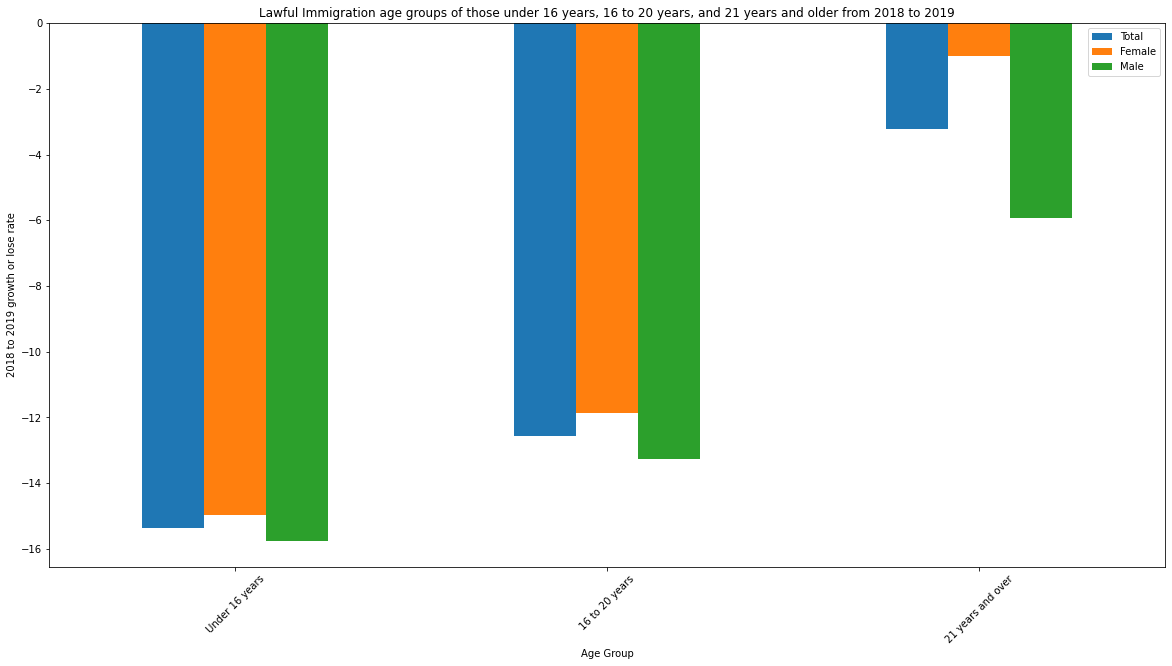

In [153]:
#Plot the DataFrame for 2018 to 2019 by age groups
lawful_age_group_2018to2019_df.plot.bar(title="Lawful Immigration age groups of those under 16 years, 16 to 20 years, and 21 years and older from 2018 to 2019", ylabel="2018 to 2019 growth or lose rate", figsize=(20, 10), rot=45)

savename = "Lawful Immigration age groups of those under 16 years, 16 to 20 years, and 21 years and older 2018 to 2019.svg"
plt.savefig("Images/"+ savename, bbox_inches='tight')

savename = "Lawful Immigration age groups of those under 16 years, 16 to 20 years, and 21 years and older 2018 to 2019.png"
plt.savefig("Images/"+ savename, bbox_inches='tight')

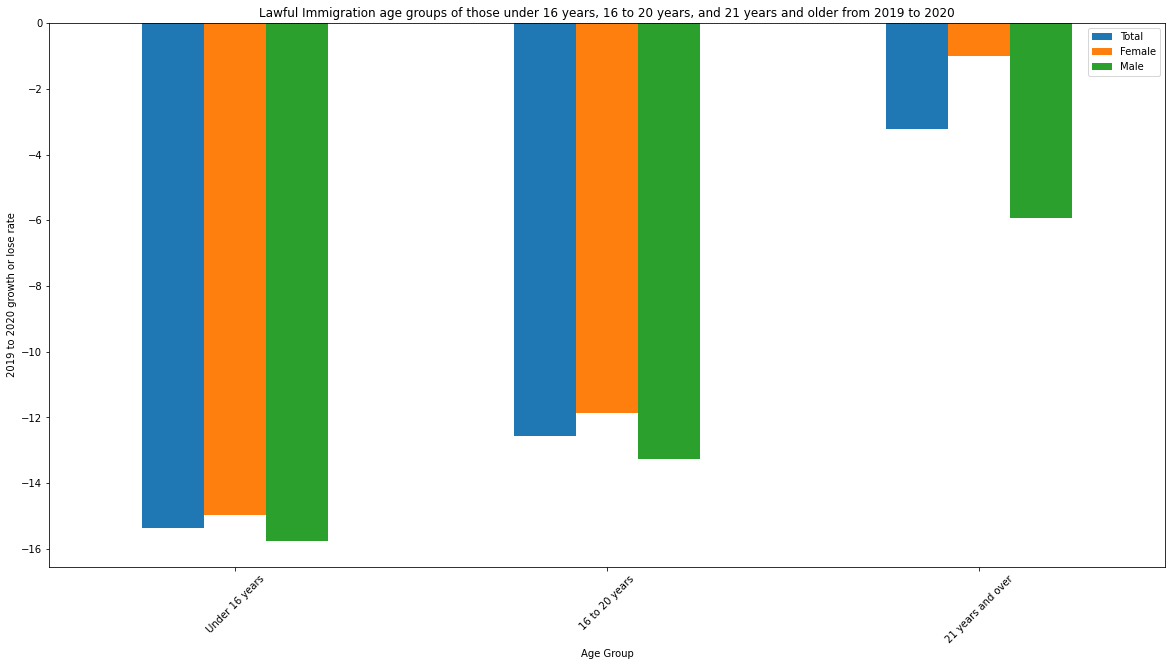

In [154]:
#Plot the DataFrame for 2019 to 2020 by age groups
lawful_age_group_2018to2019_df.plot.bar(title="Lawful Immigration age groups of those under 16 years, 16 to 20 years, and 21 years and older from 2019 to 2020", ylabel="2019 to 2020 growth or lose rate", figsize=(20, 10), rot=45)

savename = "Lawful Immigration age groups of those under 16 years, 16 to 20 years, and 21 years and older 2018 to 2019.svg"
plt.savefig("Images/"+ savename, bbox_inches='tight')

savename = "Lawful Immigration age groups of those under 16 years, 16 to 20 years, and 21 years and older 2018 to 2019.png"
plt.savefig("Images/"+ savename, bbox_inches='tight')

In [155]:
#calculate the rate for each gender
nat_total_16to20_2018_2019_rate = ((nat_total_group_16to20_2019 - nat_total_group_16to20_2018)/nat_total_group_16to20_2018)*100
nat_total_16to20_2019_2020_rate = ((nat_total_group_16to20_2020 - nat_total_group_16to20_2019)/nat_total_group_16to20_2019)*100

nat_total_over21_2018_2019_rate = ((nat_total_group_over21_2019 - nat_total_group_over21_2018)/nat_total_group_over21_2018)*100
nat_total_over21_2019_2020_rate = ((nat_total_group_over21_2020 - nat_total_group_over21_2019)/nat_total_group_over21_2019)*100

nat_total_under16_2018_2019_rate = ((nat_total_group_under16_2019 - nat_total_group_under16_2018)/nat_total_group_under16_2018)*100
nat_total_under16_2019_2020_rate = ((nat_total_group_under16_2020 - nat_total_group_under16_2019)/nat_total_group_under16_2019)*100


nat_fem_16to20_2018_2019_rate = ((nat_fem_group_16to20_2019 - nat_fem_group_16to20_2018)/nat_fem_group_16to20_2018)*100
nat_fem_16to20_2019_2020_rate = ((nat_fem_group_16to20_2020 - nat_fem_group_16to20_2019)/nat_fem_group_16to20_2019)*100

nat_fem_over21_2018_2019_rate = ((nat_fem_group_over21_2019 - nat_fem_group_over21_2018)/nat_fem_group_over21_2018)*100
nat_fem_over21_2019_2020_rate = ((nat_fem_group_over21_2020 - nat_fem_group_over21_2019)/nat_fem_group_over21_2019)*100

nat_fem_under16_2018_2019_rate = ((nat_fem_group_under16_2019 - nat_fem_group_under16_2018)/nat_fem_group_under16_2018)*100
nat_fem_under16_2019_2020_rate = ((nat_fem_group_under16_2020 - nat_fem_group_under16_2019)/nat_fem_group_under16_2019)*100


nat_male_16to20_2018_2019_rate = ((nat_male_group_16to20_2019 - nat_male_group_16to20_2018)/nat_male_group_16to20_2018)*100
nat_male_16to20_2019_2020_rate = ((nat_male_group_16to20_2020 - nat_male_group_16to20_2019)/nat_male_group_16to20_2019)*100

nat_male_over21_2018_2019_rate = ((nat_male_group_over21_2019 - nat_male_group_over21_2018)/nat_male_group_over21_2018)*100
nat_male_over21_2019_2020_rate = ((nat_male_group_over21_2020 - nat_male_group_over21_2019)/nat_male_group_over21_2019)*100

nat_male_under16_2018_2019_rate = ((nat_male_group_under16_2019 - nat_male_group_under16_2018)/nat_male_group_under16_2018)*100
nat_male_under16_2019_2020_rate = ((nat_male_group_under16_2020 - nat_male_group_under16_2019)/nat_male_group_under16_2019)*100

In [156]:
#Create a DataFrame of the calculated rates by each age group
nat_age_group_2018to2019_rate = {'Age Group': ['Under 16 years', '16 to 20 years', '21 years and over'], 'Total': [nat_total_under16_2018_2019_rate, nat_total_16to20_2018_2019_rate, nat_total_over21_2018_2019_rate],\
     'Female': [nat_fem_under16_2018_2019_rate, nat_fem_16to20_2018_2019_rate, nat_fem_over21_2018_2019_rate], 'Male': [nat_male_under16_2018_2019_rate, nat_male_16to20_2018_2019_rate, nat_male_over21_2018_2019_rate]}

nat_age_group_2019to2020_rate = {'Age Group': ['Under 16 years', '16 to 20 years', '21 years and over'], 'Total': [nat_total_under16_2019_2020_rate, nat_total_16to20_2019_2020_rate, nat_total_over21_2019_2020_rate],\
     'Female': [nat_fem_under16_2019_2020_rate, nat_fem_16to20_2019_2020_rate, nat_fem_over21_2019_2020_rate], 'Male': [nat_male_under16_2019_2020_rate, nat_male_16to20_2019_2020_rate, nat_male_over21_2019_2020_rate]}

nat_age_group_2018to2019_df=pd.DataFrame(nat_age_group_2018to2019_rate)
nat_age_group_2018to2019_df = nat_age_group_2018to2019_df.set_index('Age Group')

nat_age_group_2019to2020_df=pd.DataFrame(nat_age_group_2019to2020_rate)
nat_age_group_2019to2020_df = nat_age_group_2019to2020_df.set_index('Age Group')

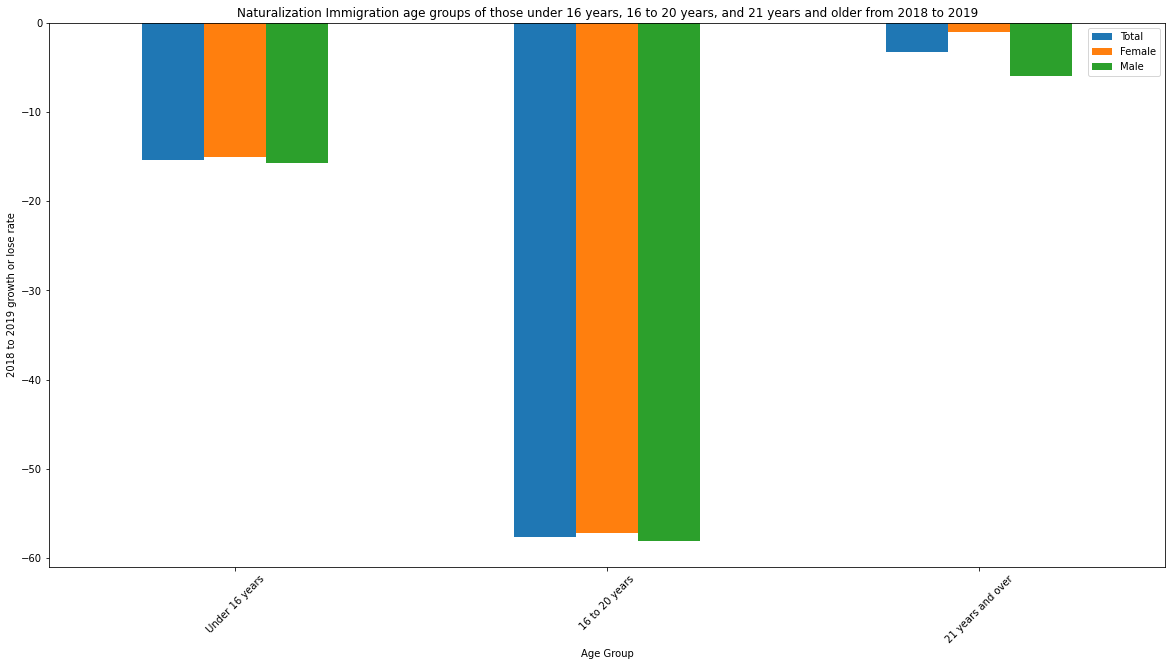

In [157]:
#Plot the DataFrame for 2018 to 2019 by age groups
nat_age_group_2018to2019_df.plot.bar(title="Naturalization Immigration age groups of those under 16 years, 16 to 20 years, and 21 years and older from 2018 to 2019", ylabel="2018 to 2019 growth or lose rate", figsize=(20, 10), rot=45)

savename = "Naturalized Immigration age groups of those under 16 years, 16 to 20 years, and 21 years and older 2018 to 2019.svg"
plt.savefig("Images/"+ savename, bbox_inches='tight')

savename = "Naturalized Immigration age groups of those under 16 years, 16 to 20 years, and 21 years and older 2018 to 2019.png"
plt.savefig("Images/"+ savename, bbox_inches='tight')

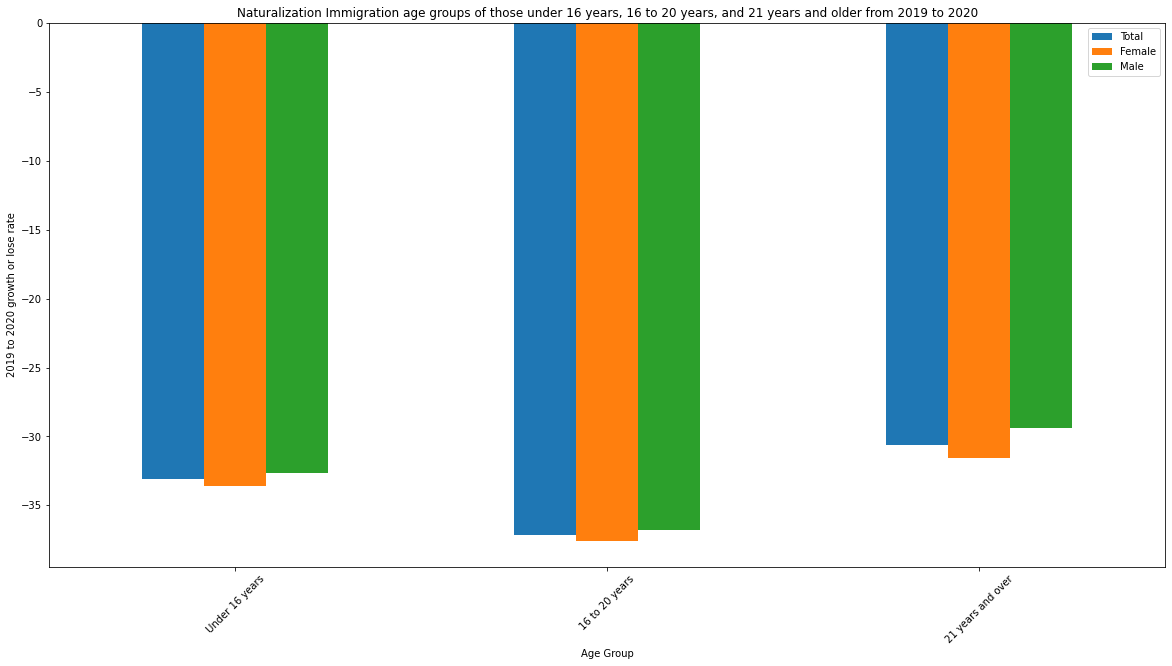

In [158]:
#Plot the DataFrame for 2018 to 2019 by age groups
nat_age_group_2019to2020_df.plot.bar(title="Naturalization Immigration age groups of those under 16 years, 16 to 20 years, and 21 years and older from 2019 to 2020", ylabel="2019 to 2020 growth or lose rate", figsize=(20, 10), rot=45)

savename = "Naturalization Immigration age groups of those under 16 years, 16 to 20 years, and 21 years and older 2019 to 2020.svg"
plt.savefig("Images/"+ savename, bbox_inches='tight')

savename = "Naturalization Immigration age groups of those under 16 years, 16 to 20 years, and 21 years and older 2019 to 2020.png"
plt.savefig("Images/"+ savename, bbox_inches='tight')